<a href="https://colab.research.google.com/github/christybiji/MIT-IDSS-Customer-Segmentation/blob/main/Learner_Fullcode_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**


---

#### **Business Context**  
Understanding customer personality and behavior is pivotal for businesses to enhance customer satisfaction and increase revenue. Segmentation based on a customer's personality, demographics, and purchasing behavior allows companies to create tailored marketing campaigns, improve customer retention, and optimize product offerings.  

A leading retail company with a rapidly growing customer base seeks to gain deeper insights into their customers' profiles. The company recognizes that understanding customer personalities, lifestyles, and purchasing habits can unlock significant opportunities for personalizing marketing strategies and creating loyalty programs. These insights can help address critical business challenges, such as improving the effectiveness of marketing campaigns, identifying high-value customer groups, and fostering long-term relationships with customers.  

With the competition intensifying in the retail space, moving away from generic strategies to more targeted and personalized approaches is essential for sustaining a competitive edge.  

---

#### **Objective**  
In an effort to optimize marketing efficiency and enhance customer experience, the company has embarked on a mission to identify distinct customer segments. By understanding the characteristics, preferences, and behaviors of each group, the company aims to:  
1. Develop personalized marketing campaigns to increase conversion rates.  
2. Create effective retention strategies for high-value customers.  
3. Optimize resource allocation, such as inventory management, pricing strategies, and store layouts.  

As a data scientist tasked with this project, your responsibility is to analyze the given customer data, apply machine learning techniques to segment the customer base, and provide actionable insights into the characteristics of each segment.  

---

#### **Data Dictionary**  
The dataset includes historical data on customer demographics, personality traits, and purchasing behaviors. Key attributes are:  

1. **Customer Information**  
   - **ID:** Unique identifier for each customer.  
   - **Year_Birth:** Customer's year of birth.  
   - **Education:** Education level of the customer.  
   - **Marital_Status:** Marital status of the customer.  
   - **Income:** Yearly household income (in dollars).  
   - **Kidhome:** Number of children in the household.  
   - **Teenhome:** Number of teenagers in the household.  
   - **Dt_Customer:** Date when the customer enrolled with the company.  
   - **Recency:** Number of days since the customer’s last purchase.  
   - **Complain:** Whether the customer complained in the last 2 years (1 for yes, 0 for no).  

2. **Spending Information (Last 2 Years)**  
   - **MntWines:** Amount spent on wine.  
   - **MntFruits:** Amount spent on fruits.  
   - **MntMeatProducts:** Amount spent on meat.  
   - **MntFishProducts:** Amount spent on fish.  
   - **MntSweetProducts:** Amount spent on sweets.  
   - **MntGoldProds:** Amount spent on gold products.  

3. **Purchase and Campaign Interaction**  
   - **NumDealsPurchases:** Number of purchases made using a discount.  
   - **AcceptedCmp1:** Response to the 1st campaign (1 for yes, 0 for no).  
   - **AcceptedCmp2:** Response to the 2nd campaign (1 for yes, 0 for no).  
   - **AcceptedCmp3:** Response to the 3rd campaign (1 for yes, 0 for no).  
   - **AcceptedCmp4:** Response to the 4th campaign (1 for yes, 0 for no).  
   - **AcceptedCmp5:** Response to the 5th campaign (1 for yes, 0 for no).  
   - **Response:** Response to the last campaign (1 for yes, 0 for no).  

4. **Shopping Behavior**  
   - **NumWebPurchases:** Number of purchases made through the company’s website.  
   - **NumCatalogPurchases:** Number of purchases made using catalogs.  
   - **NumStorePurchases:** Number of purchases made directly in stores.  
   - **NumWebVisitsMonth:** Number of visits to the company’s website in the last month.  

# **Let's start coding!**

## **Importing necessary libraries**

In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to suppress warnings
import warnings

warnings.filterwarnings("ignore")

## **Loading the data**

In [ ]:
# uncomment and run the following line if using Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# loading data into a pandas dataframe
data = pd.read_csv("/content/drive/MyDrive/MIT IDSS : Data Science and Machine Learning /Week 3: Making Sense of Unstructured Data Project-1/Assignment/marketing_campaign.csv", sep="\t")
#print(data)

## **Data Overview**

#### **Question 1**: What are the data types of all the columns?

In [ ]:
# Write your code here.
data.info()
#print(data.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

##### **Observations:**
*   Education, Martial_Status and Dt_Customer are type 'object'.
*   All the othere column data types are integers and floats, essentially numbers.
*   All the columns have 2240 enteries except for column 'Income' which has only 2216 entries. The Income column has 24 null values.


#### **Question 2:** Check the statistical summary of the data. What is the average household income?

In [ ]:
# Write your code here
data.describe(include='all')
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


##### **Observations:**
##### **Observations:** The average household income is 52247.251354.

#### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

Missing Income entries: 24 (1.07%)


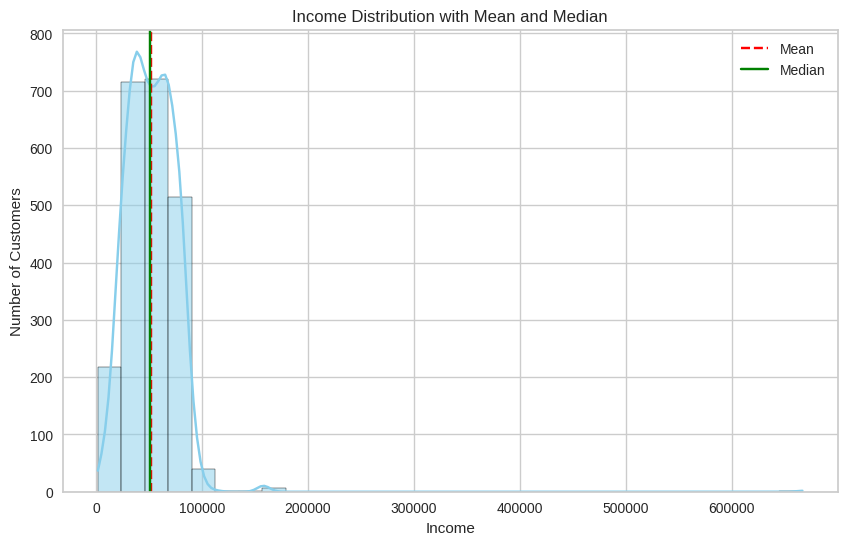

In [ ]:
# Write your code here
data.isnull().sum()[data.isnull().sum() > 0]
missing_percentage = (24 / len(data)) * 100
print(f"Missing Income entries: 24 ({missing_percentage:.2f}%)")

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data['Income'], bins=30, kde=True, color='skyblue', edgecolor='black')

# Add mean and median lines
plt.axvline(data['Income'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(data['Income'].median(), color='green', linestyle='-', label='Median')

plt.title('Income Distribution with Mean and Median')
plt.xlabel('Income')
plt.ylabel('Number of Customers')
plt.legend()
plt.grid(True)
plt.show()


#filling in with median
#The mean is slightly right of the median, confirming a right-skewed income distribution.
# We choose median imputation because it’s not affected by outliers, unlike the mean.
#data['Income'] = data['Income'].fillna(data['Income'].median())

# Drop rows where 'Income' is NaN
data = data.dropna(subset=['Income'])



##### **Observations:**
* Since the 24 NaN values in the 'Income' column account for less than 5% of the data their loss is not significant and hence dropped rows with missing values.
* The updated dataset shows all columns having 2216 non-null values.
Missing Income entries: 24 (1.07%)


#### **Question 4**: Are there any duplicates in the data?

In [ ]:
# Write your code here

data[data.duplicated()]



,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


In [ ]:
data.shape

(2216, 29)

##### **Observations:**
Looking at the value counts of ID, each customer is unqiue. Dropping the ID might arise overlap in other rows. Hence not dropping any rows here as each customer is unqiue, although there is overlap in other features.

## **Exploratory Data Analysis**

### Univariate Analysis

#### **Question 5:** Explore all the variables and provide observations on their distributions. (histograms and boxplots)

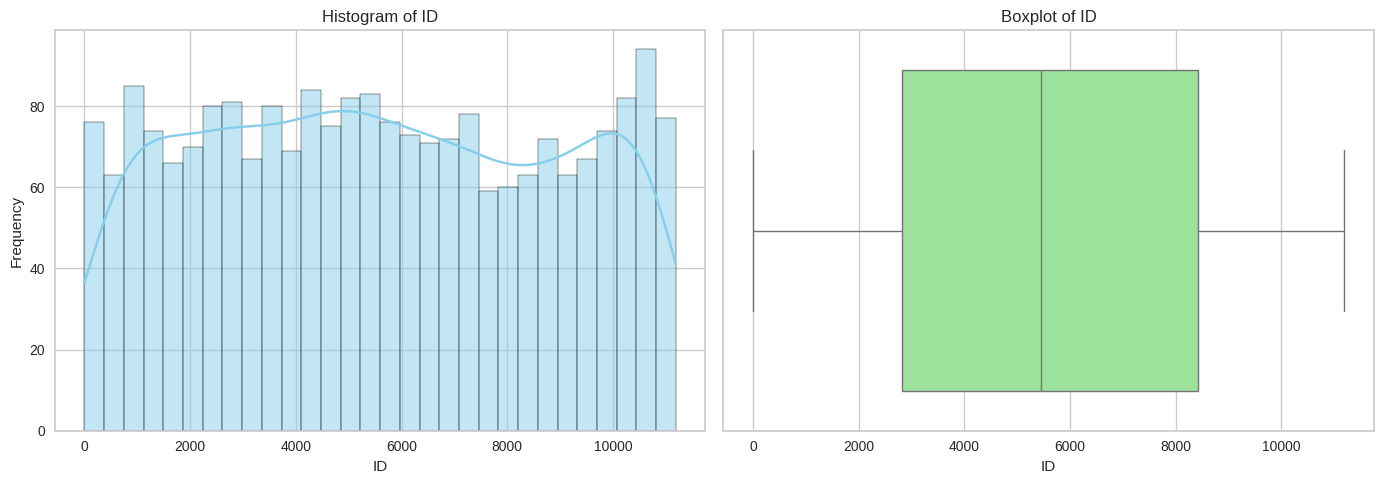

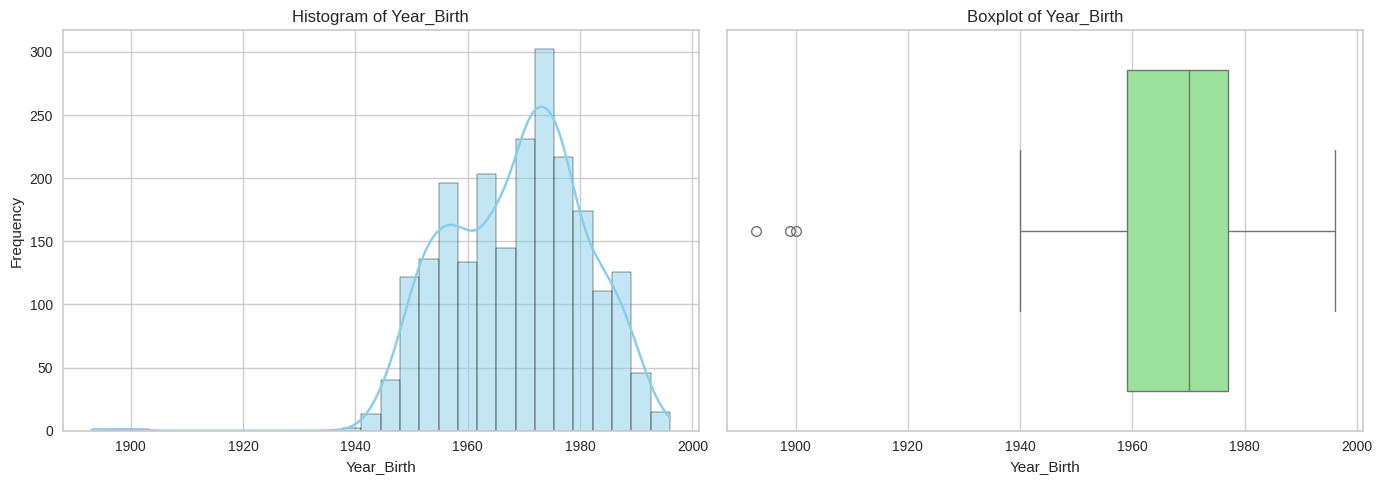

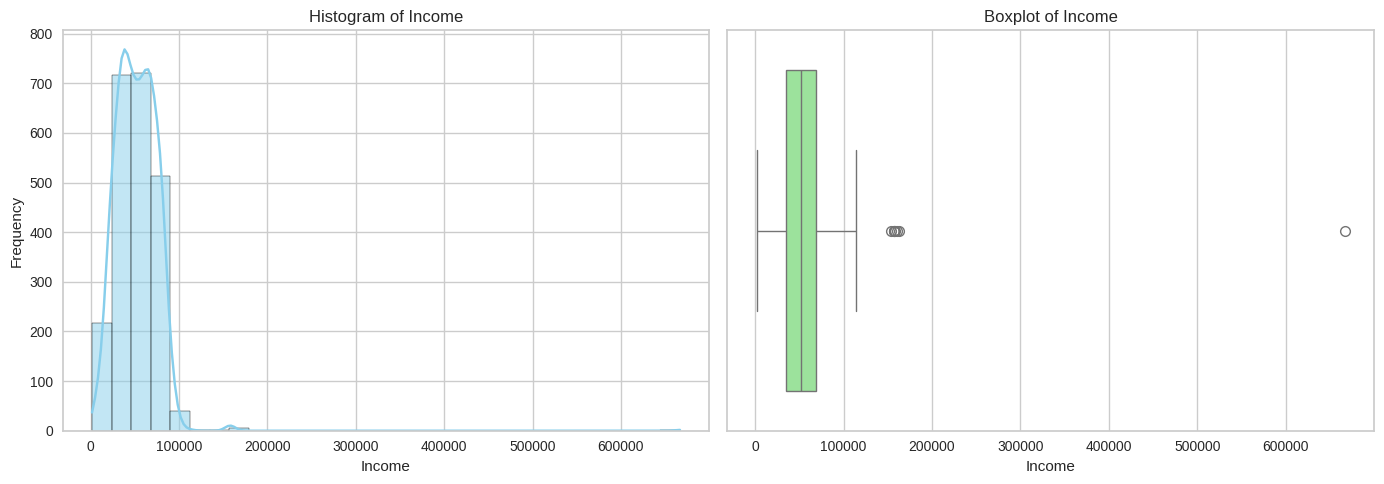

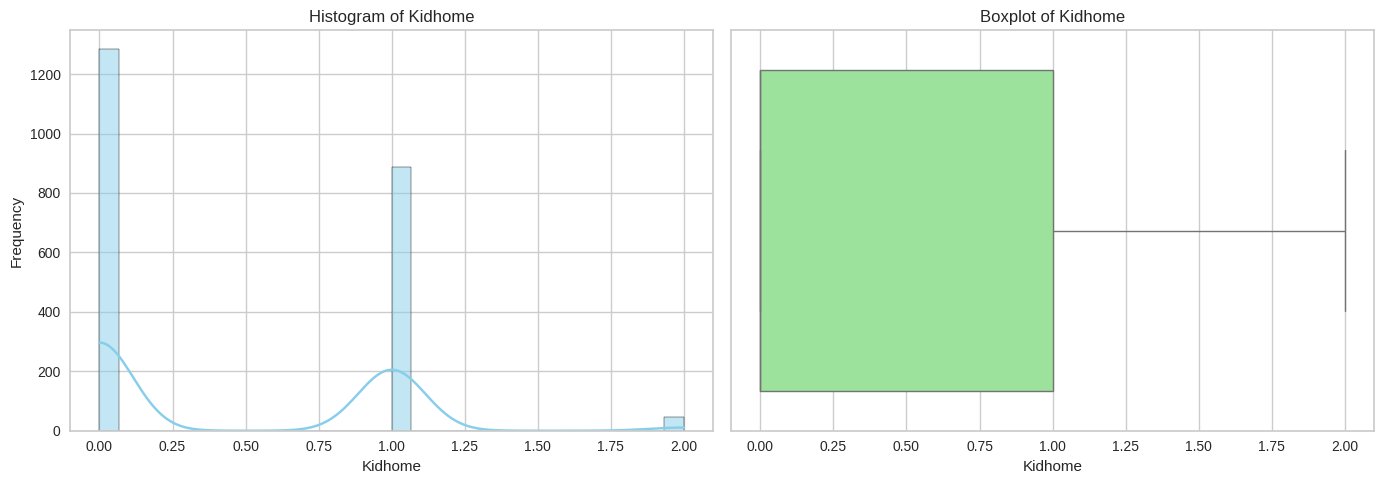

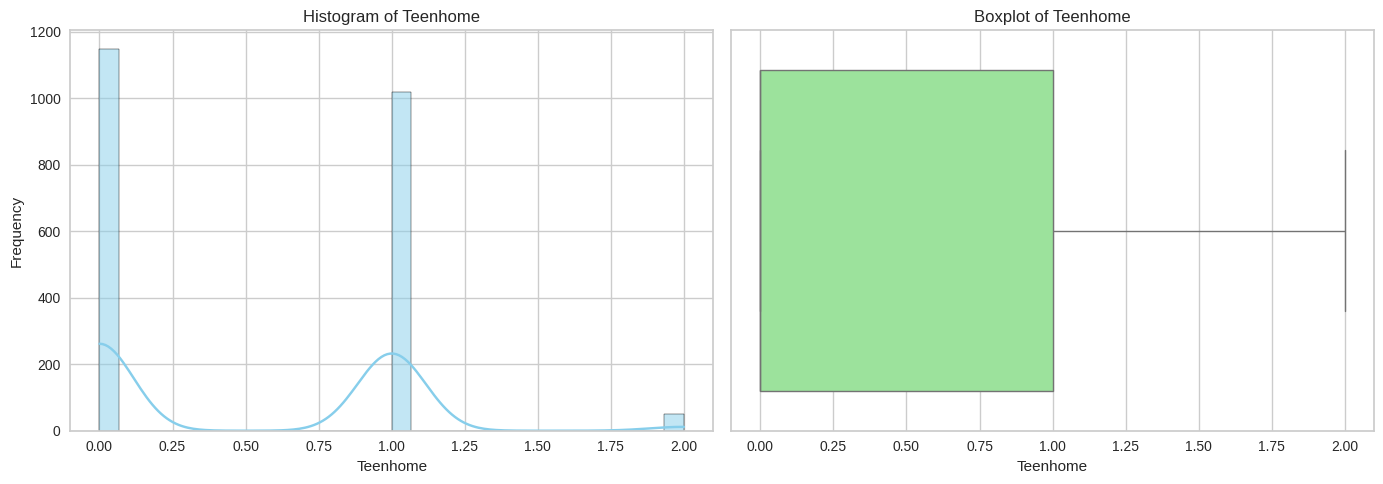

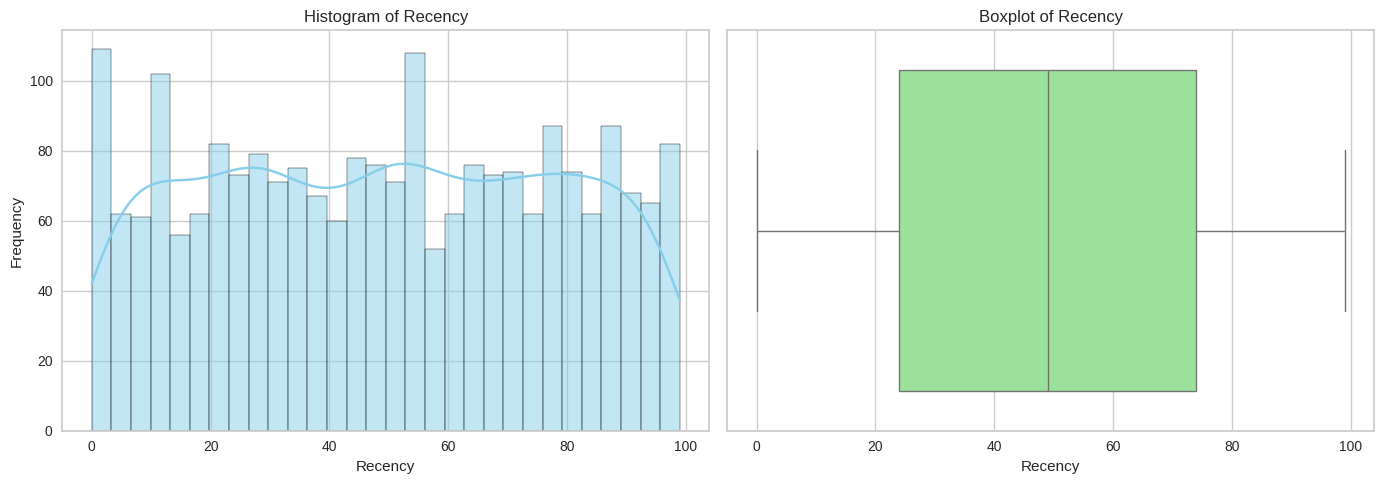

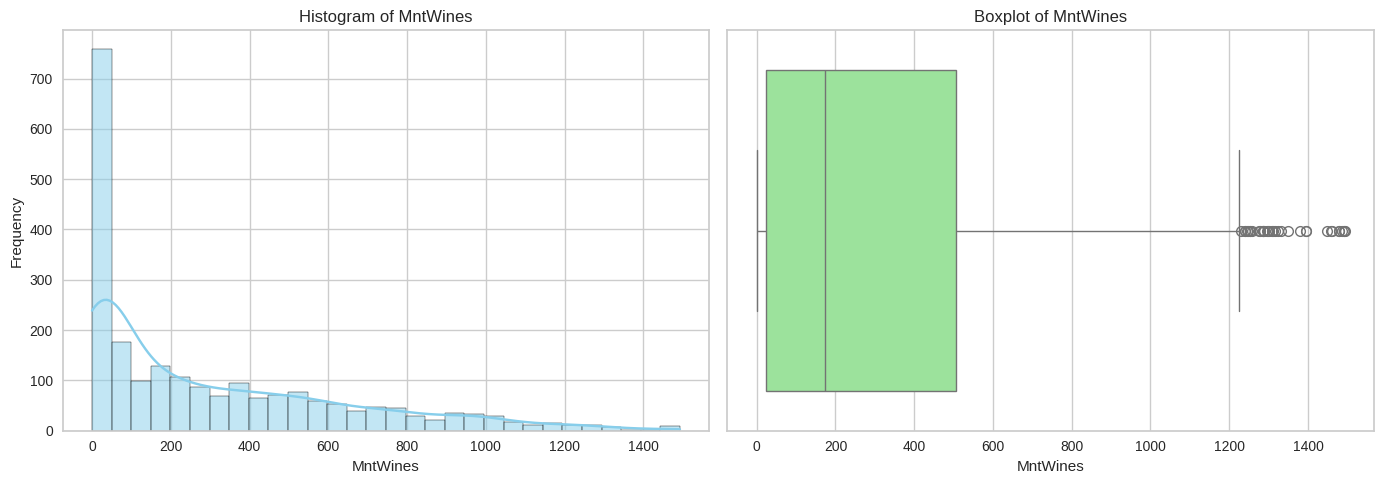

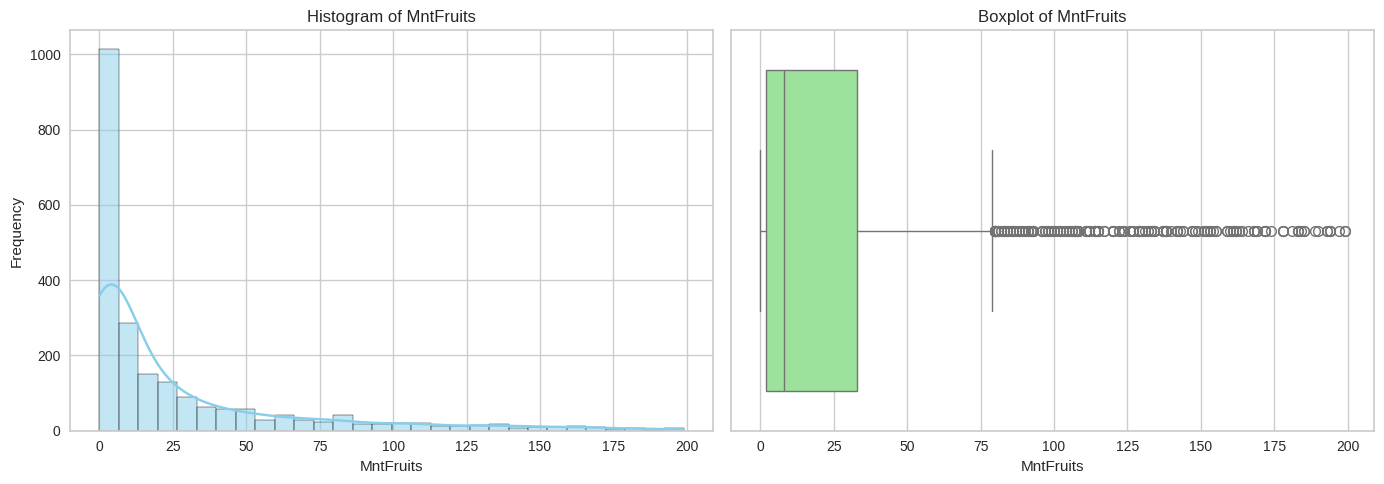

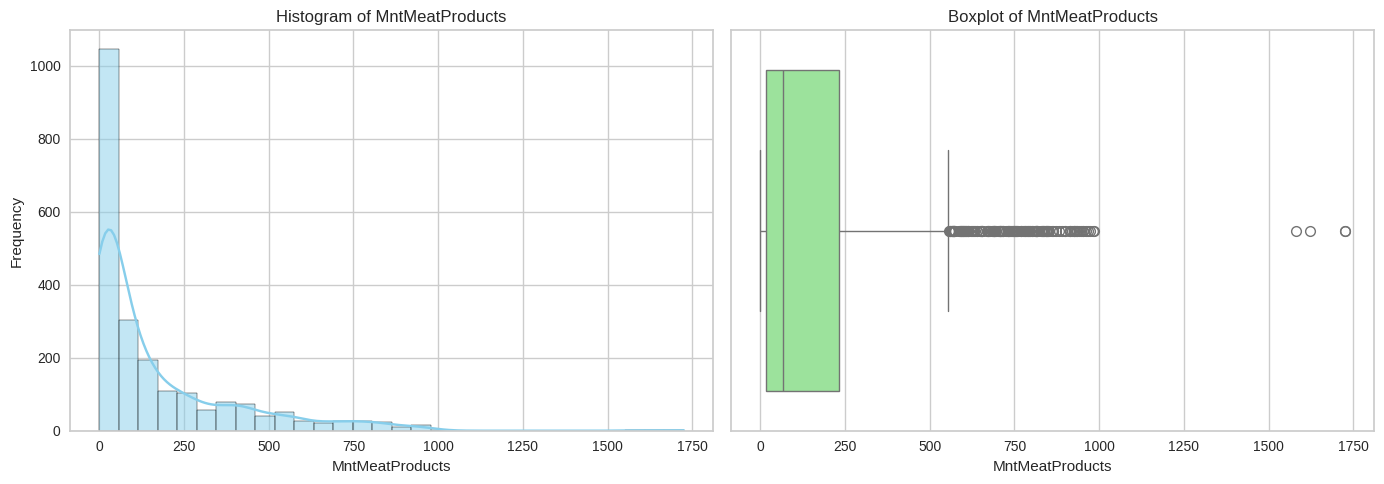

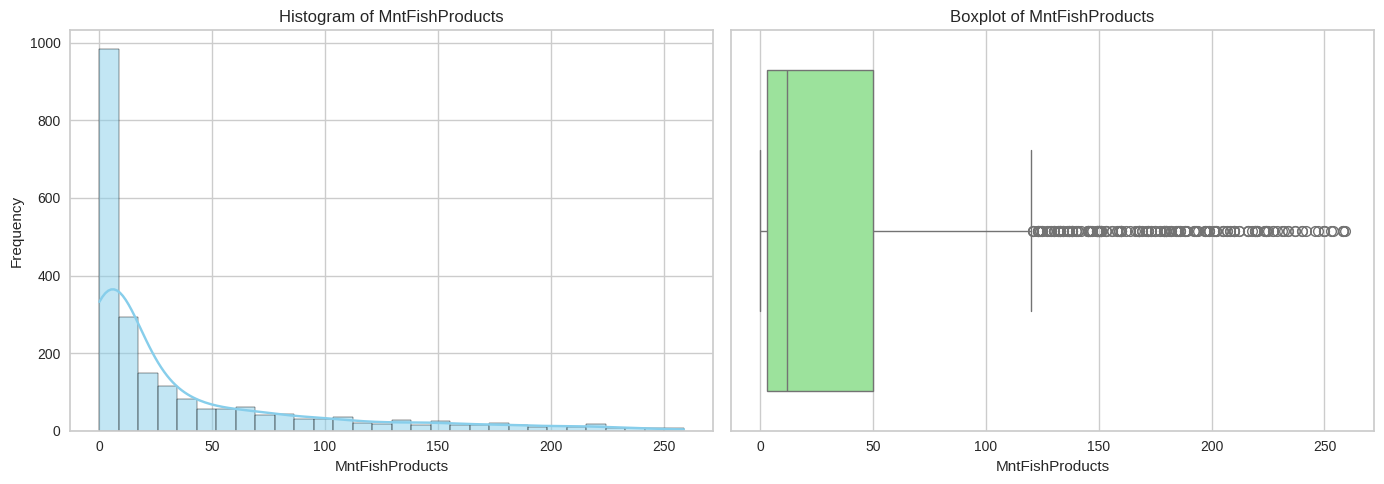

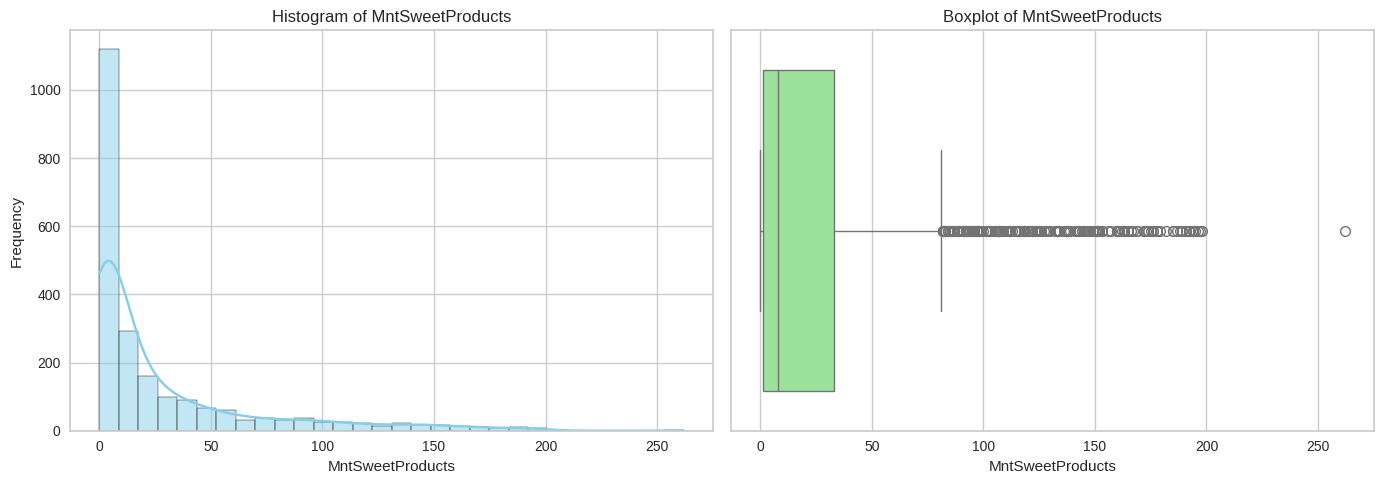

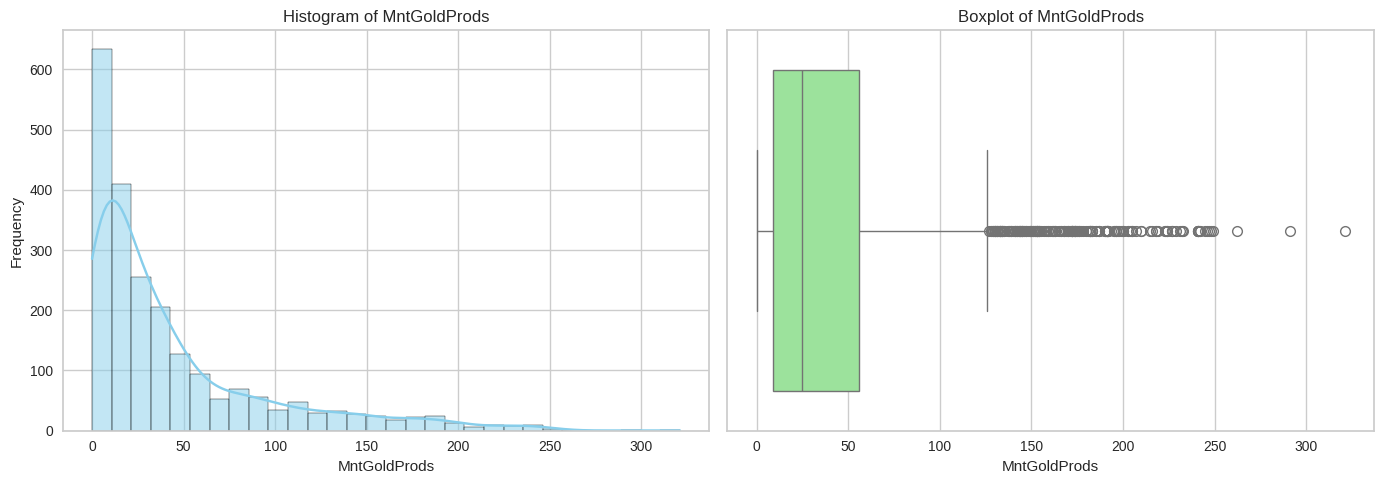

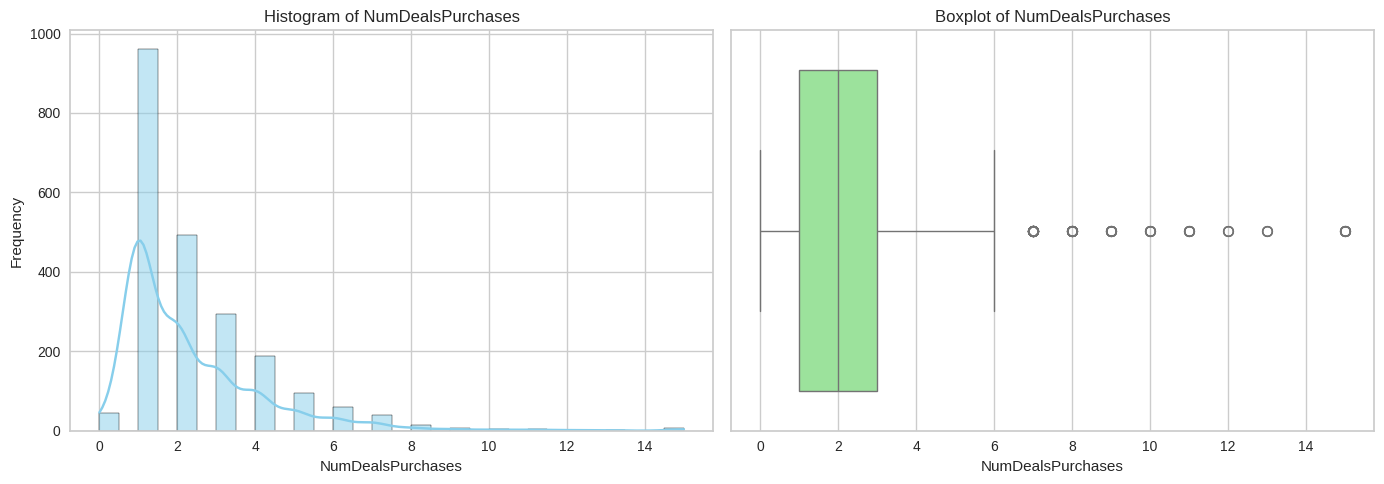

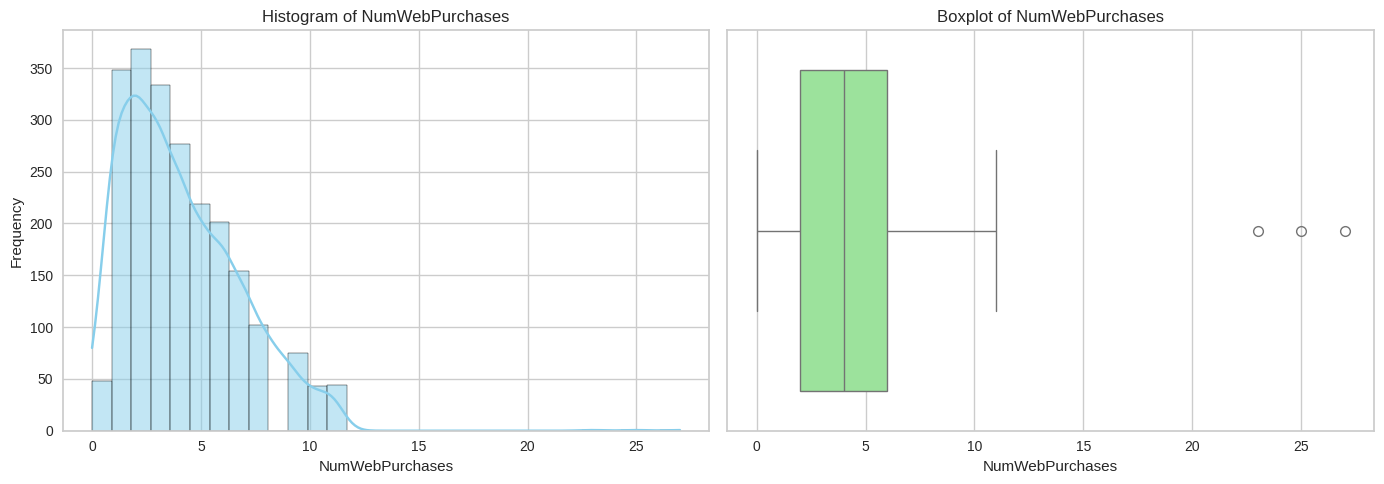

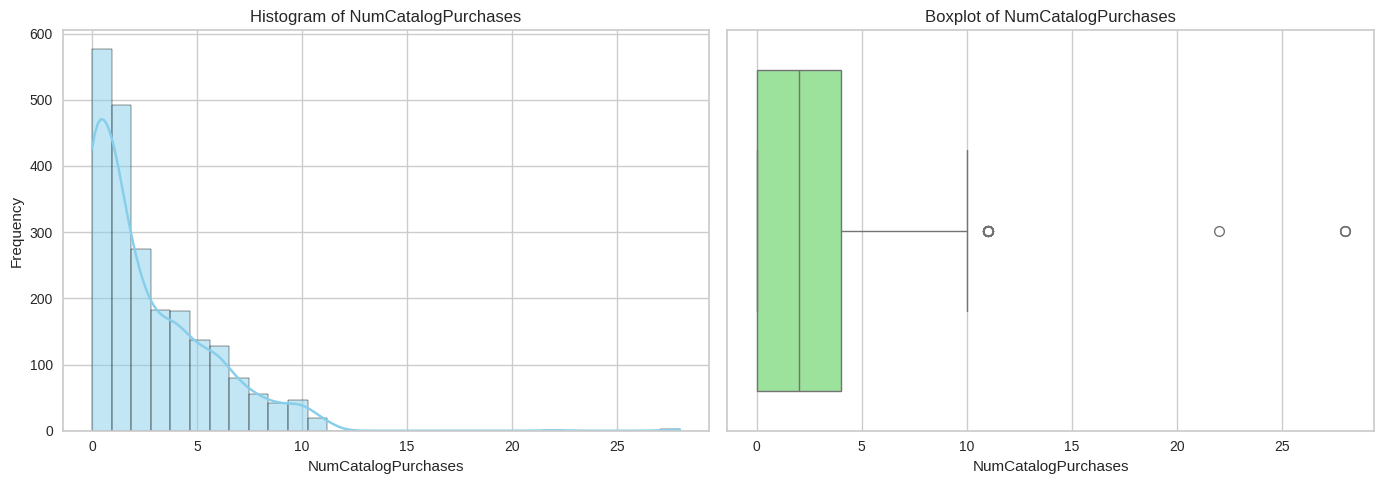

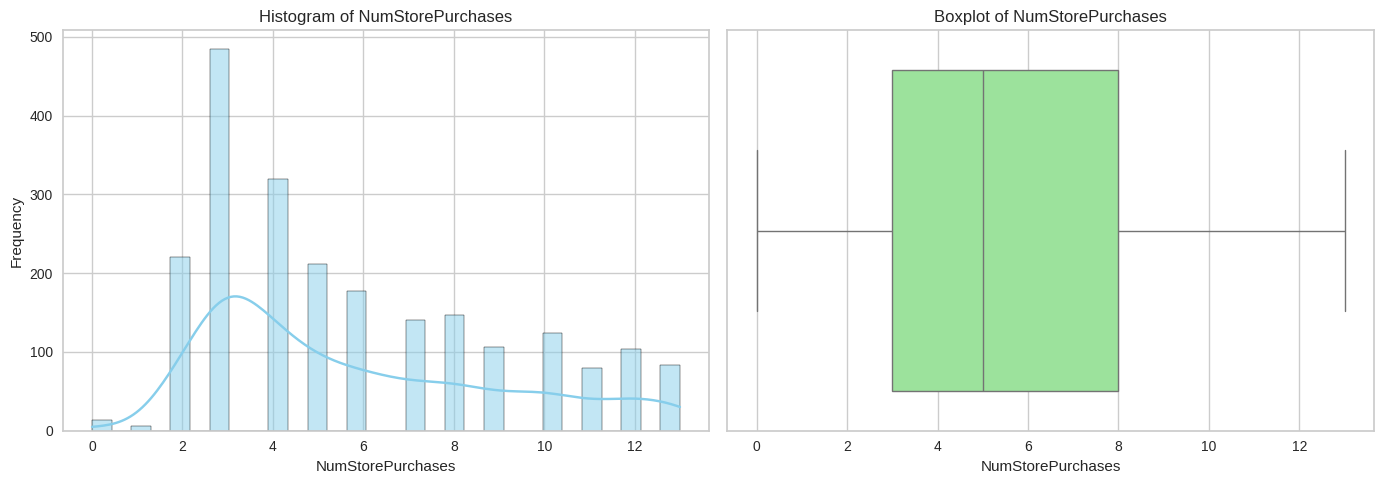

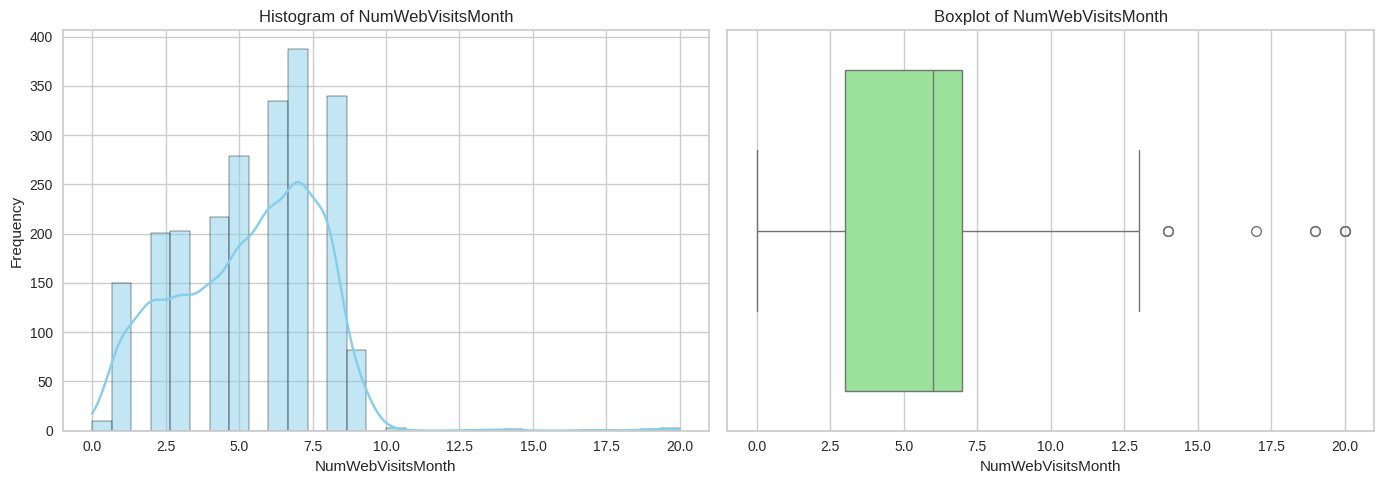

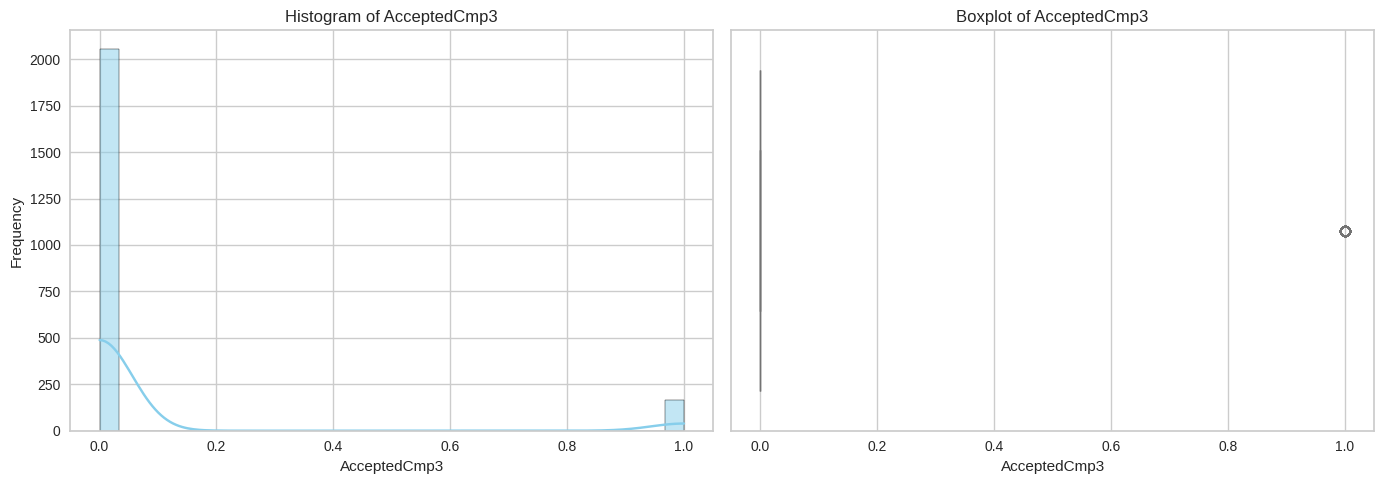

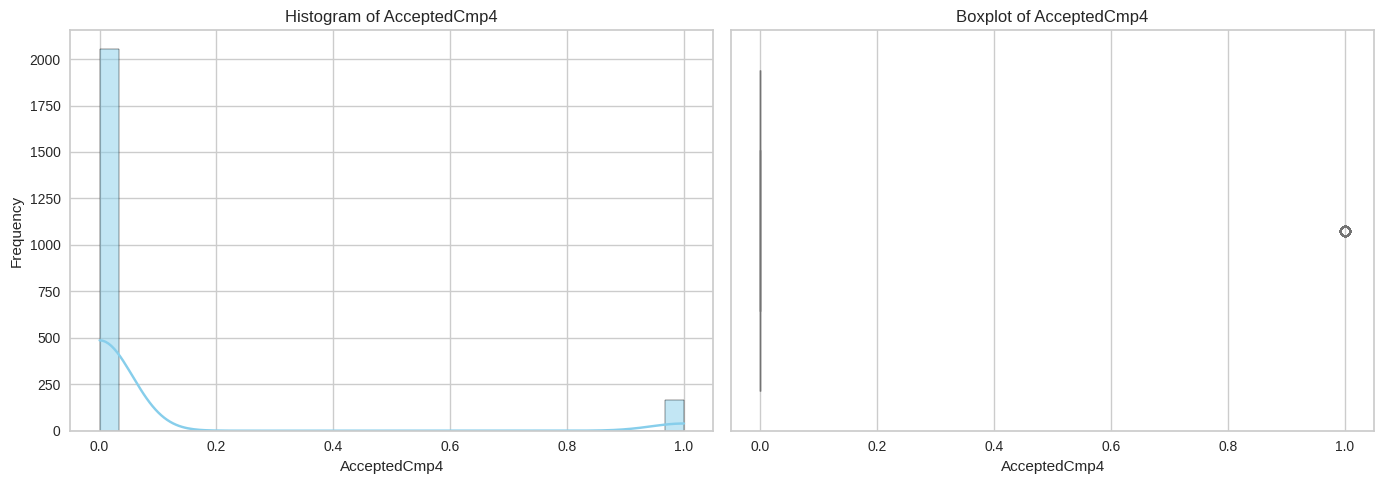

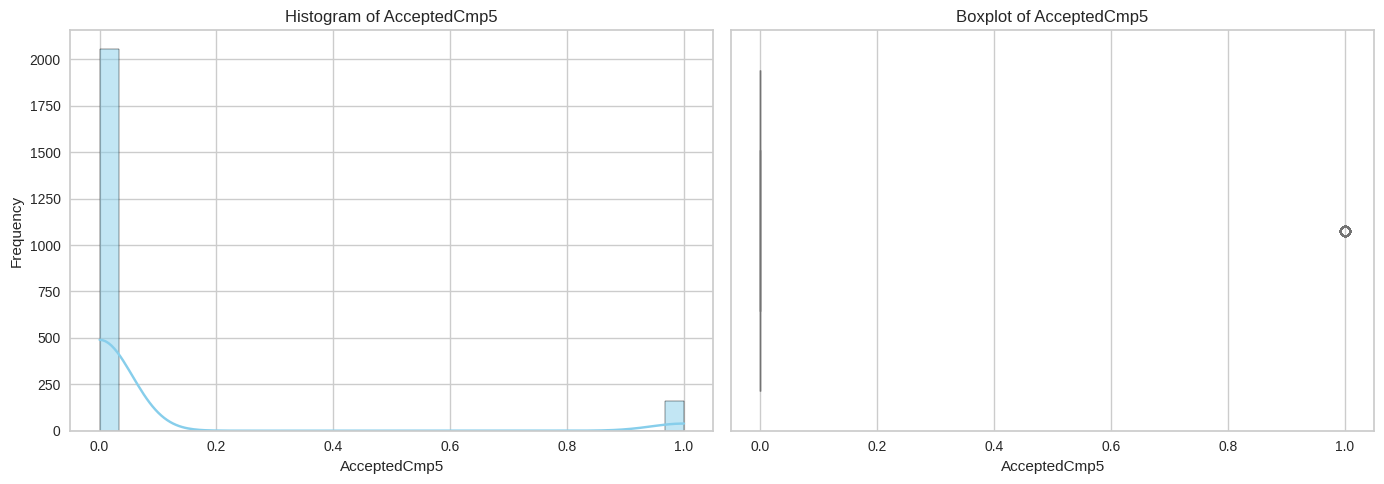

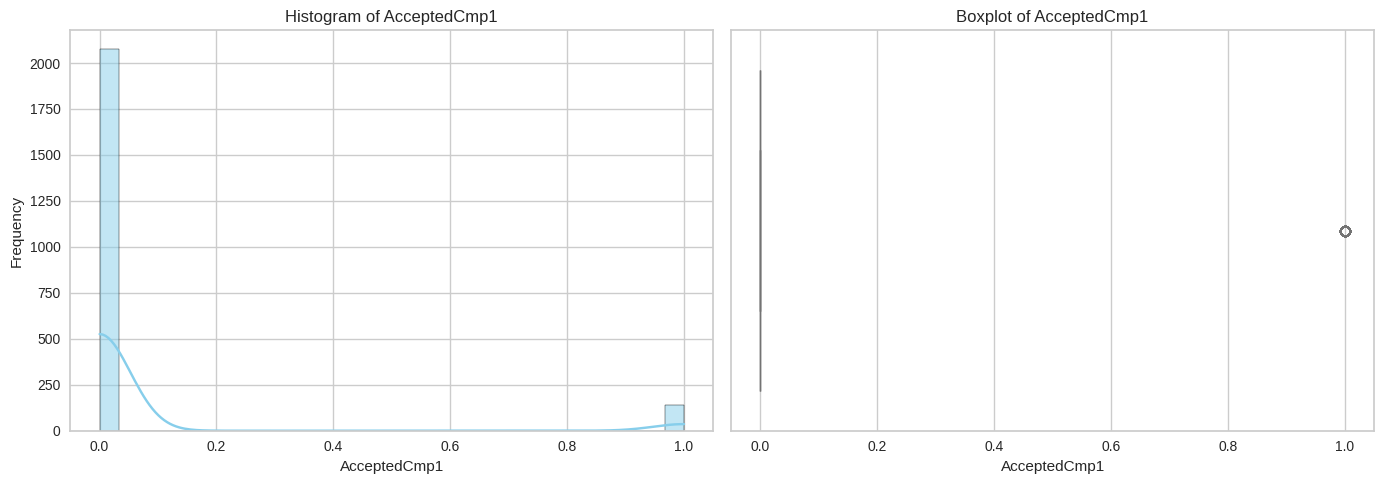

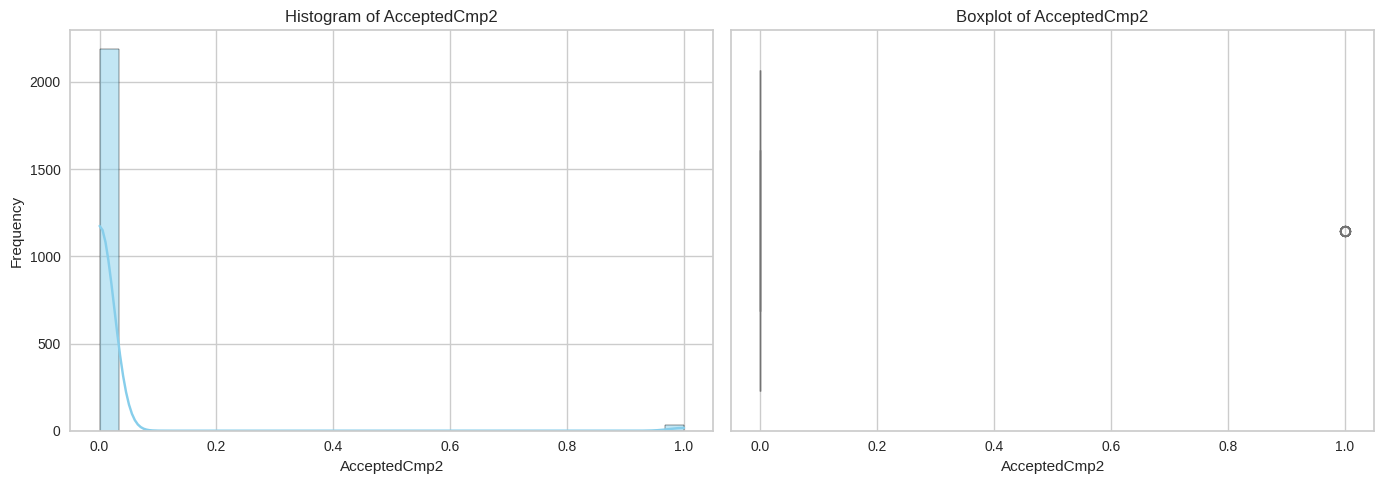

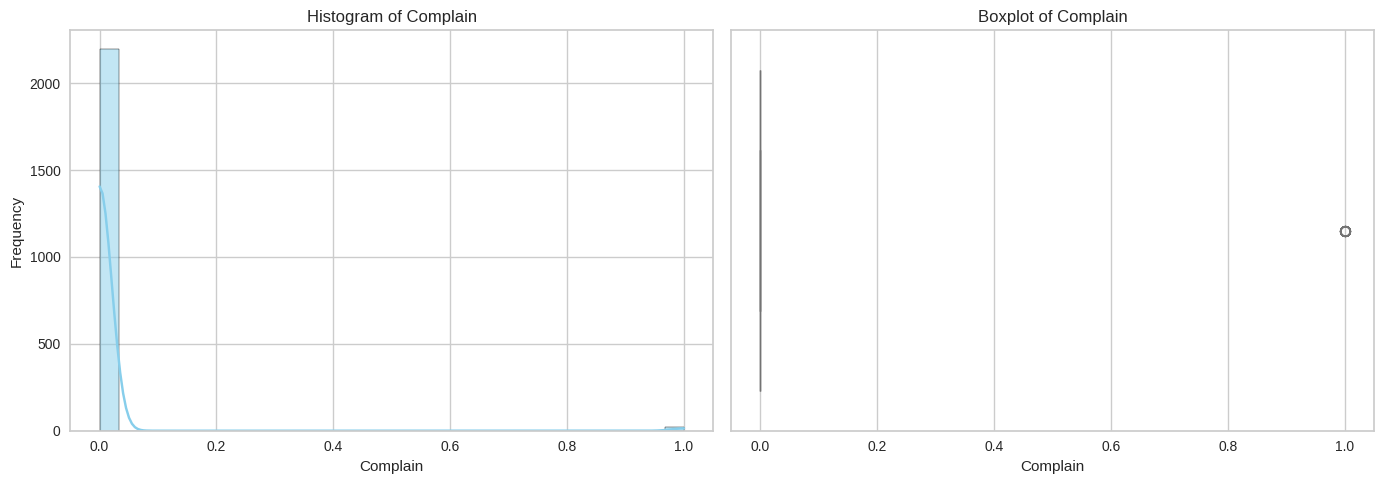

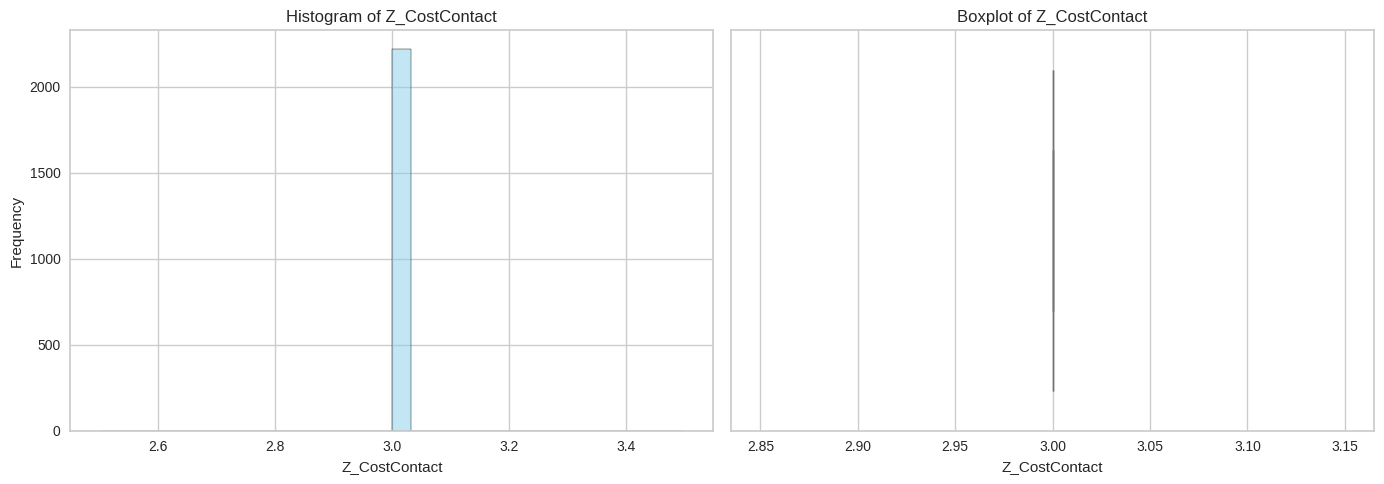

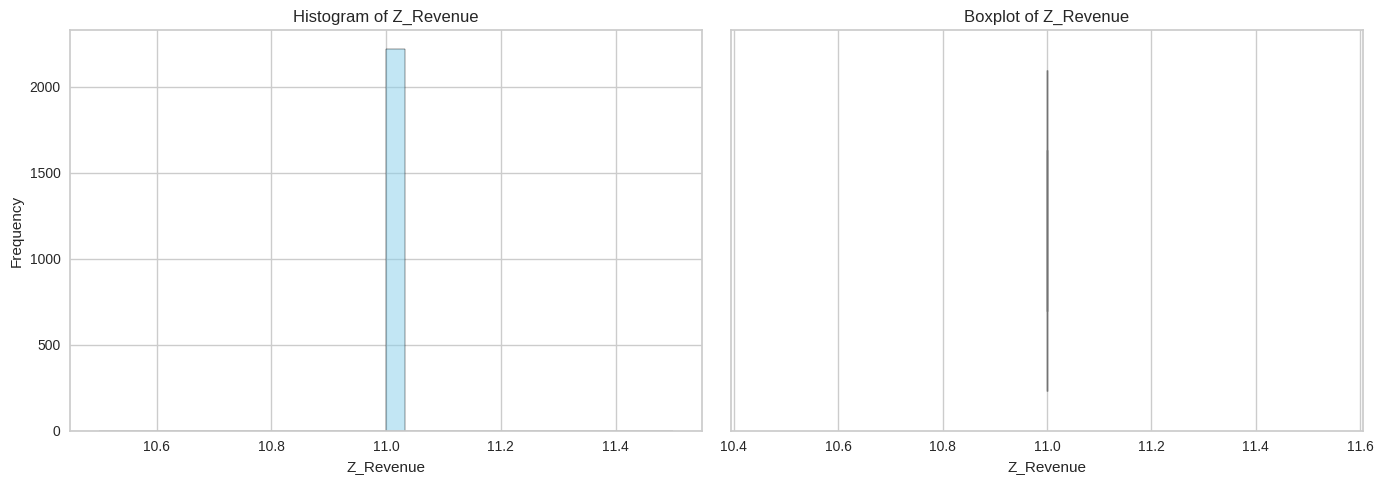

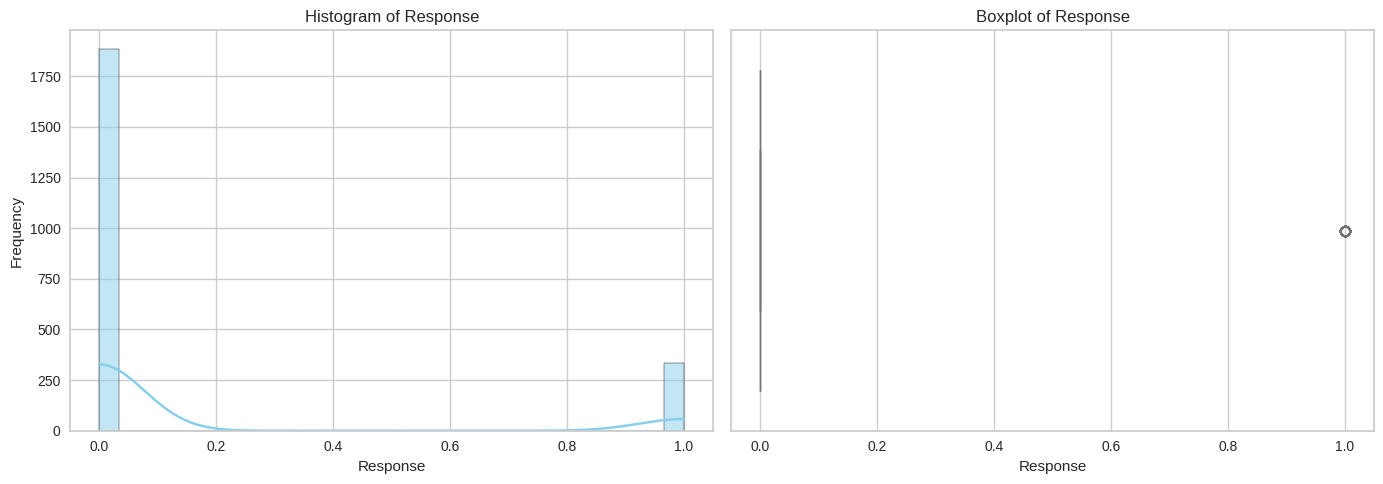

In [ ]:
# Write your code here
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns only
num_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Plot histograms and boxplots side by side for each numerical column
for col in num_cols:
    plt.figure(figsize=(14, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data[col], bins=30, kde=True, color='skyblue')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

    plt.tight_layout()
    plt.show()


##### **Observations:**

Majorly to note:

**ID:** Uniformly distributed IDs indicate a range of customer identifiers with no clear clustering.

**Year of Birth:** Primarily customers born between 1940 and 1990, showing generational diversity.

**Income:** Skewed right, indicating most customers have lower income, but there are some high-income outliers.

**Kidhome & Teenhome:** Majority have no kids or teens at home, indicative of potentially older customer demographics or singles.

**Recency:** Uniform distribution suggests consistent engagement across the customer base.

**MntWines & MntMeatProducts:** Highly skewed, with most spending little, showing a few high spenders which could be target segments for premium offerings.

**MntFruits, MntFishProducts, MntSweetProducts, MntGoldProds:** Similar to wines and meats, most spend very little, highlighting a few potential niche markets.

**NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth**: These purchase behaviors show various spending habits that could help segment customers based on shopping channel preferences.

### Bivariate Analysis

#### **Question 6:** Perform multivariate analysis to explore the relationsips between the variables.

Text(0.5, 1.0, 'Correlation Matrix')

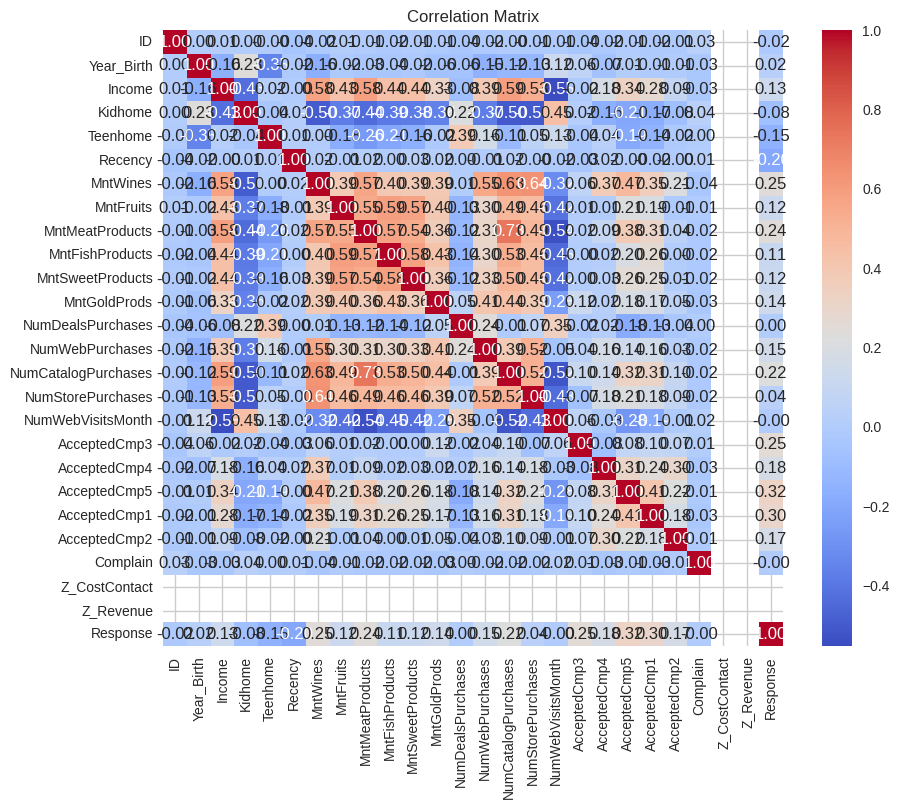

In [ ]:
# Compute the correlation matrix
# Compute the correlation matrix for numeric columns only
numeric_data = data.select_dtypes(include=['float64', 'int64'])
corr = numeric_data.corr()

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')

##### **Observations:**

* strong positive correlations between amounts spent on different product types, like wines and meats and so on.

* notable negative correlation exists between Kidhome and Income, indicating that higher income households tend to have fewer young children at home.

## **K-means Clustering**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# ----------------------------
# Step 1: Preprocessing
# ----------------------------

# Convert Dt_Customer to Tenure in days
if 'Dt_Customer' in data.columns:
    data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], dayfirst=True, errors='coerce')
    data['Tenure'] = (pd.to_datetime('today') - data['Dt_Customer']).dt.days
    data.drop(columns='Dt_Customer', inplace=True)
    print("'Dt_Customer' successfully converted to 'Tenure'")
else:
    print("'Dt_Customer' not found — skipping tenure calculation.")

# Handle categorical columns
cat_cols = []
if 'Education' in data.columns:
    cat_cols.append('Education')
if 'Marital_Status' in data.columns:
    cat_cols.append('Marital_Status')

# One-hot encode categorical columns if any
data_encoded = pd.get_dummies(data, columns=cat_cols, drop_first=True)
print(f"One-hot encoded columns: {cat_cols}")

# Drop 'ID' if present (not useful for clustering)
if 'ID' in data_encoded.columns:
    data_encoded.drop(columns='ID', inplace=True)
    print("Dropped 'ID' column")

# ----------------------------
# Step 2: Standardize
# ----------------------------

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_encoded)






'Dt_Customer' successfully converted to 'Tenure'
One-hot encoded columns: ['Education', 'Marital_Status']
Dropped 'ID' column


#### **Question 7** : Select the appropriate number of clusters using the elbow

---

Plot. What do you think is the appropriate number of clusters?

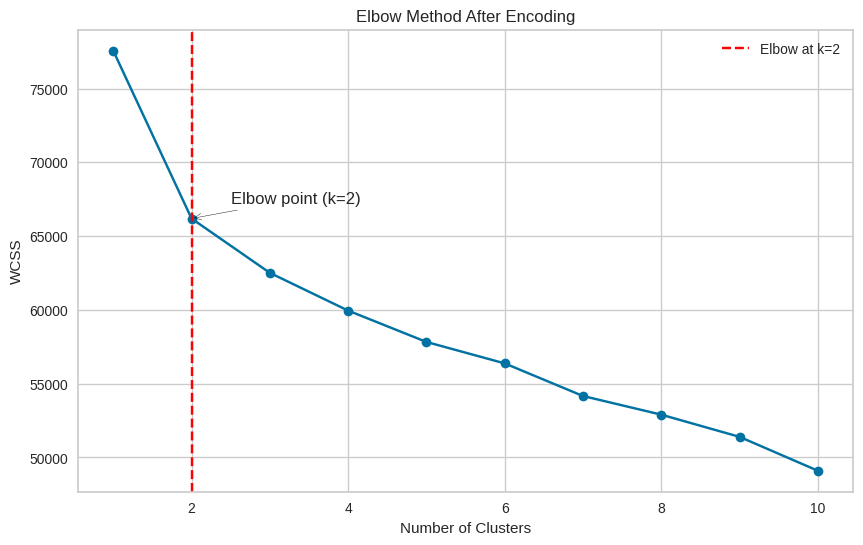

In [ ]:
# ----------------------------
# Step 3: Elbow Method
# ----------------------------

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Estimate elbow visually
elbow_k = 2  # You can update this after plotting

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.axvline(x=elbow_k, linestyle='--', color='red', label=f'Elbow at k={elbow_k}')
plt.annotate(f'Elbow point (k={elbow_k})',
             xy=(elbow_k, wcss[elbow_k-1]),
             xytext=(elbow_k+0.5, wcss[elbow_k-1] + 1000),
             arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.title('Elbow Method After Encoding')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.legend()
plt.grid(True)
plt.show()

##### **Observations:**


Elbow method suggests: 2 clusters

#### **Question 8** : finalize appropriate number of clusters by checking the silhoutte score as well. Is the answer different from the elbow plot?

Silhouette Score for 2 clusters: 0.18
Silhouette Score for 3 clusters: 0.12
Silhouette Score for 4 clusters: 0.05
Silhouette Score for 5 clusters: 0.05
Silhouette Score for 6 clusters: 0.05
Silhouette Score for 7 clusters: 0.05
Silhouette Score for 8 clusters: 0.09
Silhouette Score for 9 clusters: 0.08
Silhouette Score for 10 clusters: 0.09


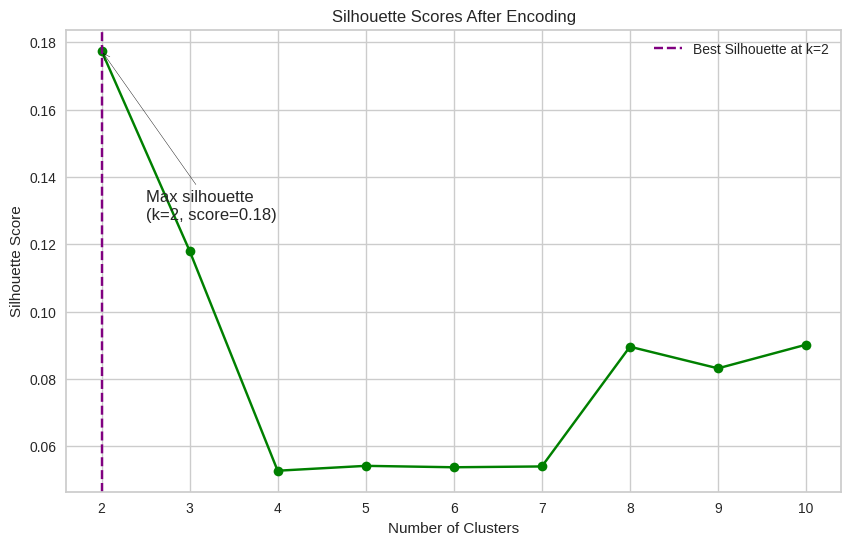

In [ ]:
# ----------------------------
# Step 4: Silhouette Scores
# ----------------------------

silhouette_scores = []
range_n_clusters = list(range(2, 11))

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_data)
    silhouette_avg = silhouette_score(scaled_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Silhouette Score for {n_clusters} clusters: {silhouette_avg:.2f}")

# Best k from silhouette
best_k = range_n_clusters[np.argmax(silhouette_scores)]
best_score = max(silhouette_scores)

plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o', color='green')
plt.axvline(x=best_k, linestyle='--', color='purple', label=f'Best Silhouette at k={best_k}')
plt.annotate(f'Max silhouette\n(k={best_k}, score={best_score:.2f})',
             xy=(best_k, best_score),
             xytext=(best_k+0.5, best_score-0.05),
             arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.title('Silhouette Scores After Encoding')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.legend()
plt.grid(True)
plt.show()


##### **Observations:**

Silhouette method suggests: 2 clusters (score = 0.18)

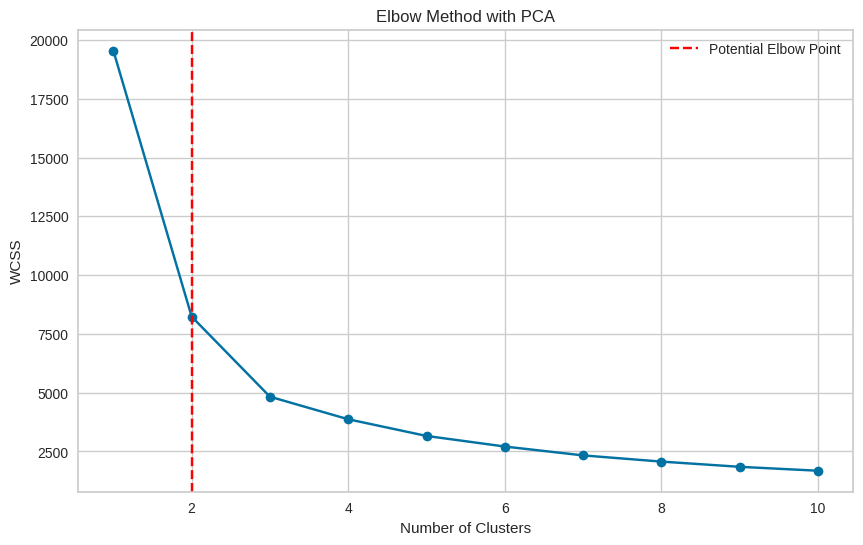

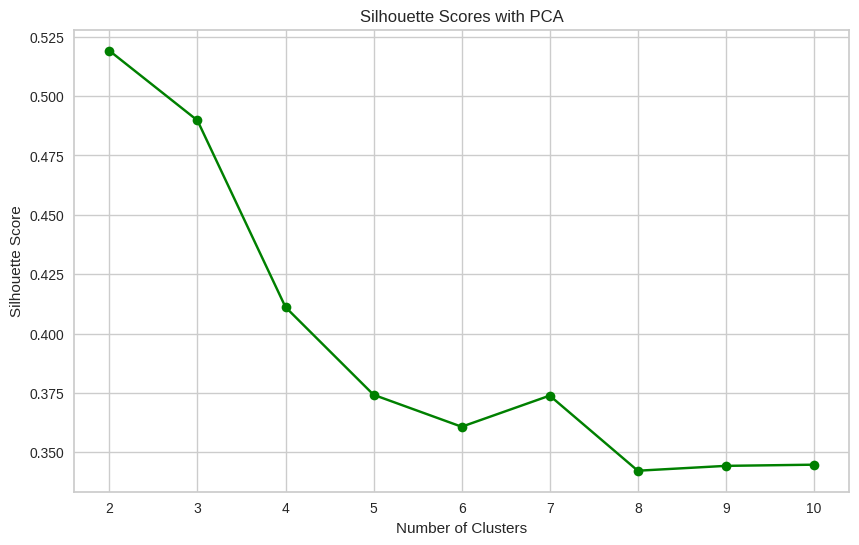

In [ ]:
##Try PCA (As the correlation matrix seems correlated enough!?)
#From the correlation matrix, we can see moderate to strong correlations (≥ 0.5) among several product features

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Load your data here
# data = pd.read_csv('your_data.csv')

# ----------------------------
# Step 1: Preprocessing
# ----------------------------

# Convert 'Dt_Customer' to tenure in days, if present
if 'Dt_Customer' in data.columns:
    data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], dayfirst=True, errors='coerce')
    data['Tenure'] = (pd.to_datetime('today') - data['Dt_Customer']).dt.days
    data.drop(columns='Dt_Customer', inplace=True)

# Handle categorical columns and one-hot encode them
cat_cols = ['Education', 'Marital_Status']  # Update this list based on your data
data_encoded = pd.get_dummies(data, columns=cat_cols, drop_first=True)

# Drop 'ID' if it is not useful for clustering
if 'ID' in data_encoded.columns:
    data_encoded.drop(columns='ID', inplace=True)

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_encoded)

# ----------------------------
# Step 2: Apply PCA
# ----------------------------

# Reduce dimensions to 2 for visualization and clustering
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
explained_variance = pca.explained_variance_ratio_

# ----------------------------
# Step 3: Clustering with K-Means (Elbow Method)
# ----------------------------

# Calculate WCSS for different number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(pca_data)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method with PCA')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.axvline(x=2, linestyle='--', color='red', label='Potential Elbow Point')
plt.legend()
plt.show()

# ----------------------------
# Step 4: Silhouette Scores
# ----------------------------

# Calculate silhouette scores for a range of cluster numbers
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(pca_data)
    silhouette_avg = silhouette_score(pca_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', color='green')
plt.title('Silhouette Scores with PCA')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()



Observations: While applying PCA on the data - the number of clusters suggested is 2 again just as non-PCA.

:#### **Question 9**: Do a final fit with the appropriate number of clusters. How much total time does it take for the model to fit the data?

In [ ]:
# Write your code here

# ----------------------------
# Summary
# ----------------------------

print(f"\nElbow method suggests: {elbow_k} clusters")
print(f"Silhouette method suggests: {best_k} clusters (score = {best_score:.2f})")
import time

# Final number of clusters based on silhouette
final_k = best_k  #non-PCA based best_k
#final_k = 3  #final_k = 2 #While going with PCA-based elbow stats


# Start timing
start_time = time.time()

# Fit the final KMeans model
kmeans_final = KMeans(n_clusters=final_k, init='k-means++', n_init=10, max_iter=300, random_state=42)
kmeans_final.fit(scaled_data)

# End timing
end_time = time.time()
fit_time = end_time - start_time

# Assign cluster labels
data_encoded['Cluster'] = kmeans_final.labels_

# Output
print(f"\n Final KMeans model fitted with {final_k} clusters")
print(f"Time taken to fit the model: {fit_time:.4f} seconds")



Elbow method suggests: 2 clusters
Silhouette method suggests: 2 clusters (score = 0.18)

 Final KMeans model fitted with 2 clusters
Time taken to fit the model: 0.0370 seconds


##### **Observations:**

## **Cluster Profiling and Comparison**

#### **Question 10**: Perform cluster profiling using boxplots for the K-Means algorithm. Analyze key characteristics of each cluster and provide detailed observations.

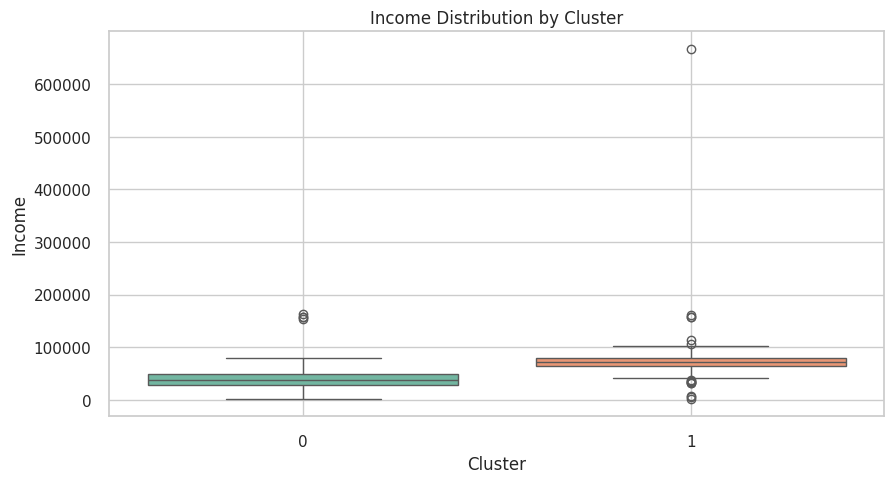

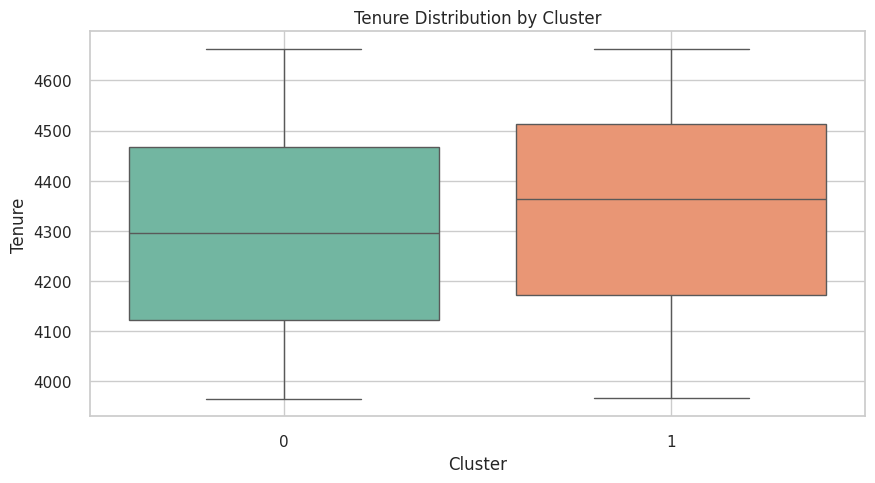

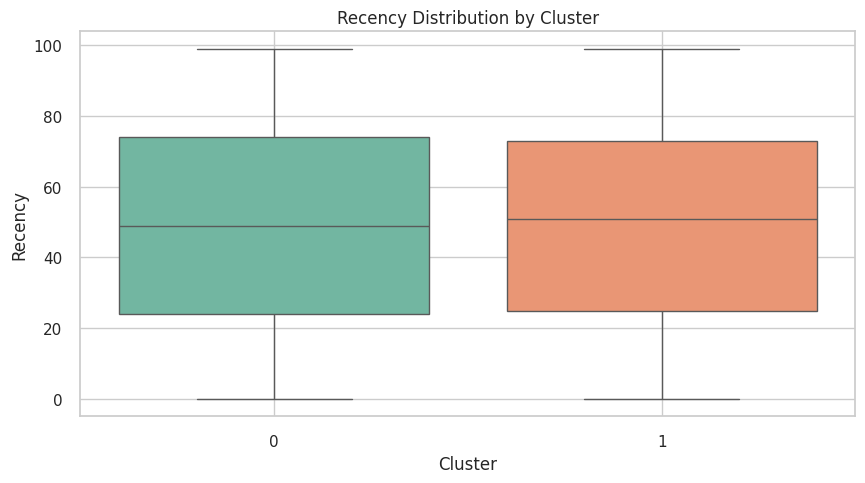

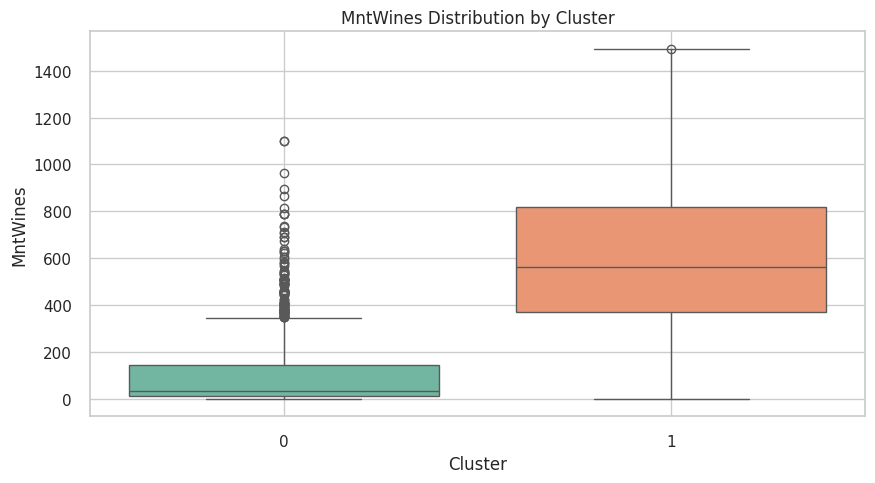

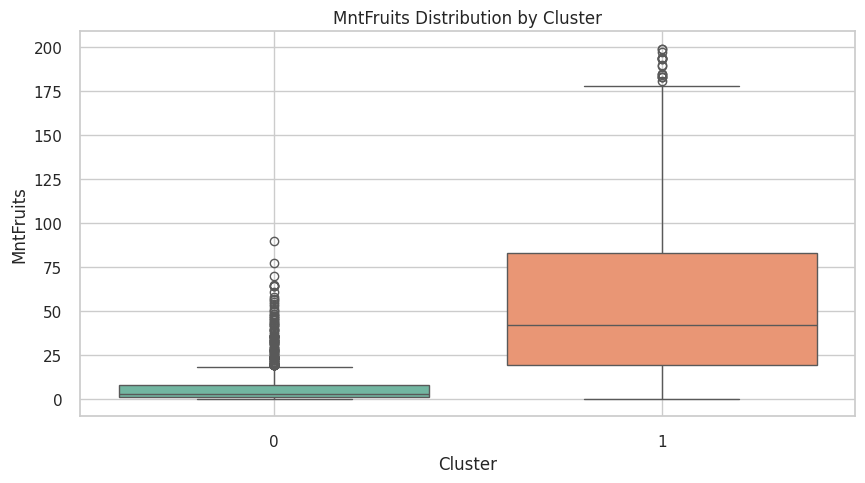

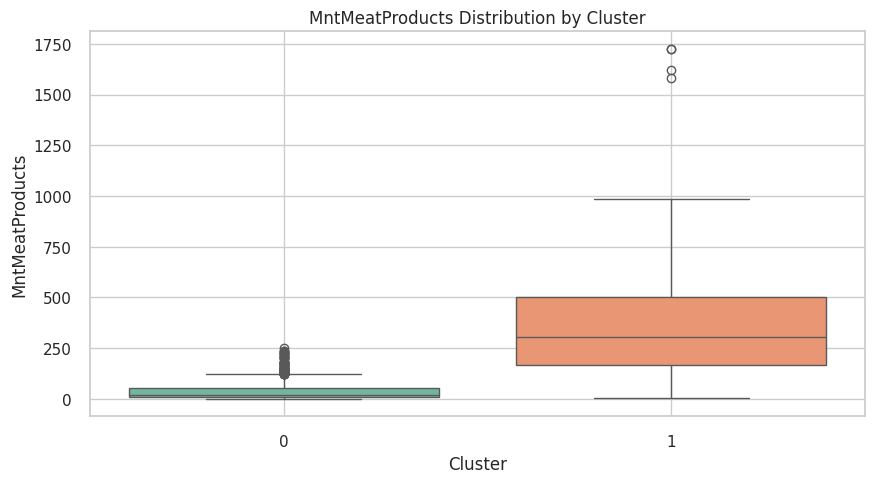

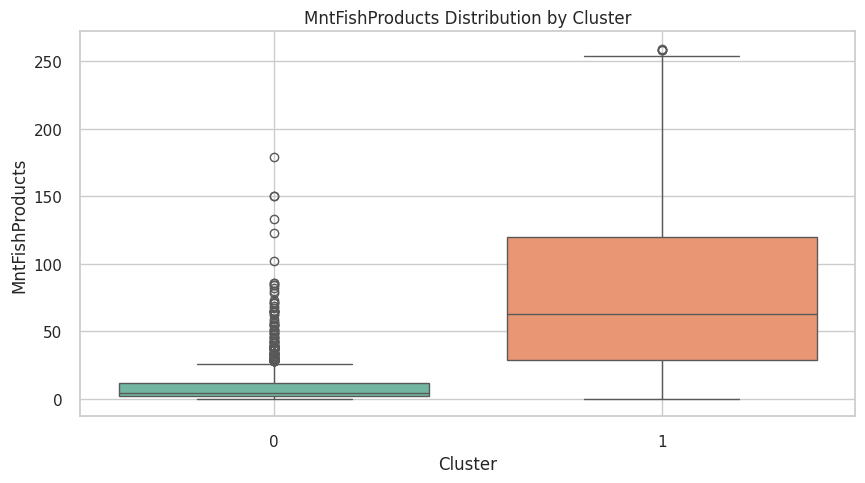

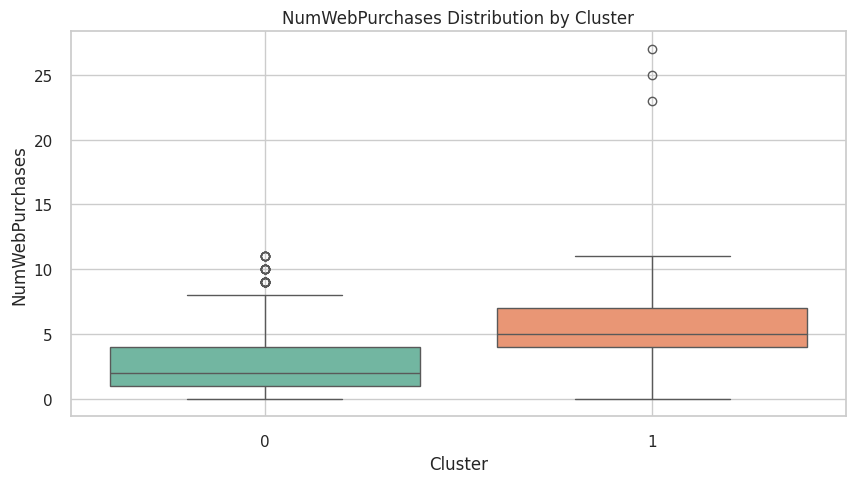

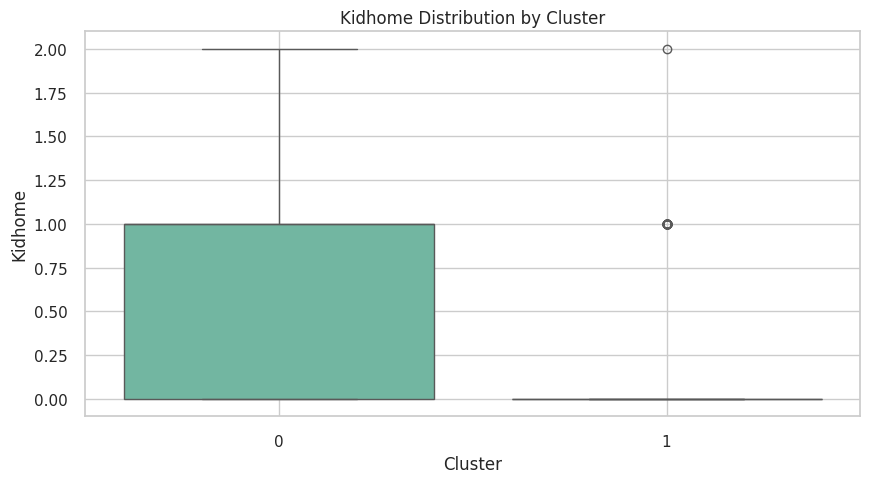

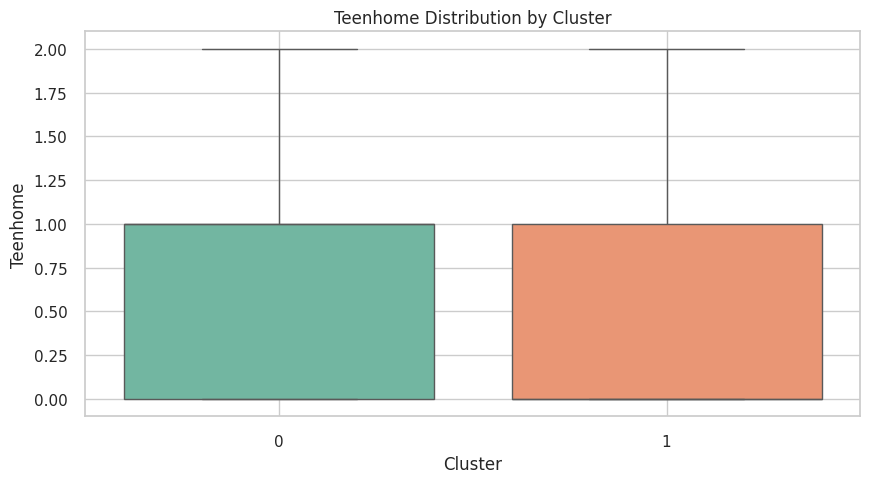

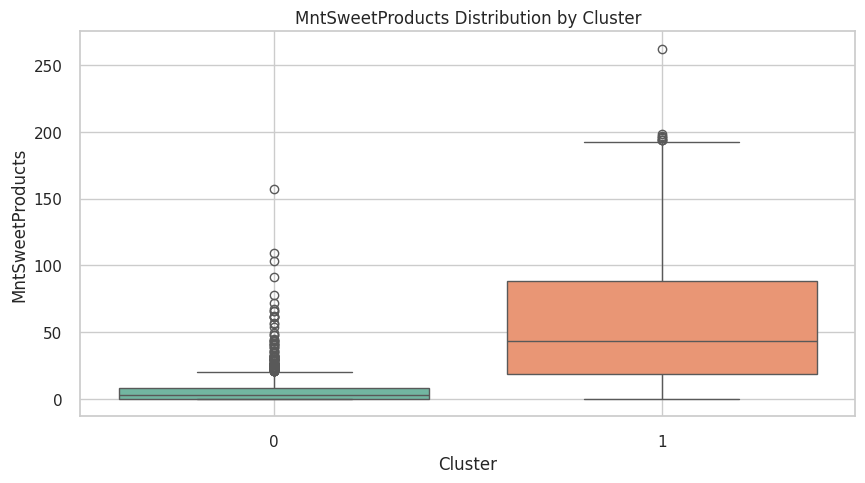

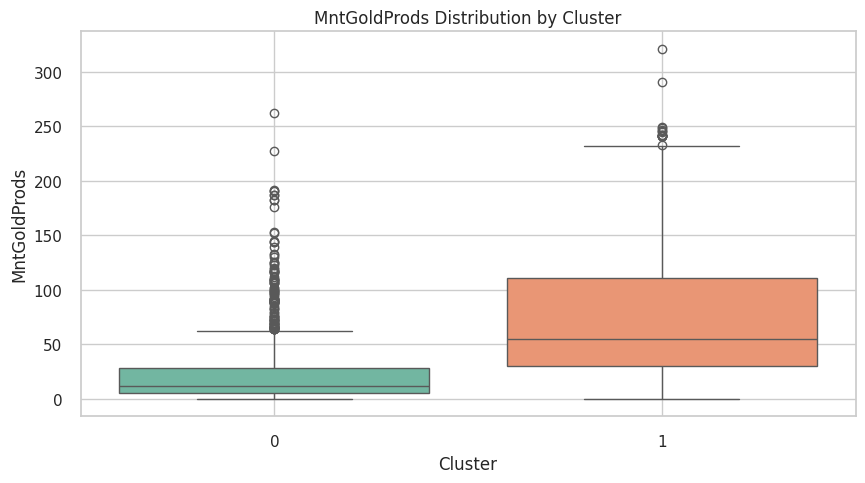

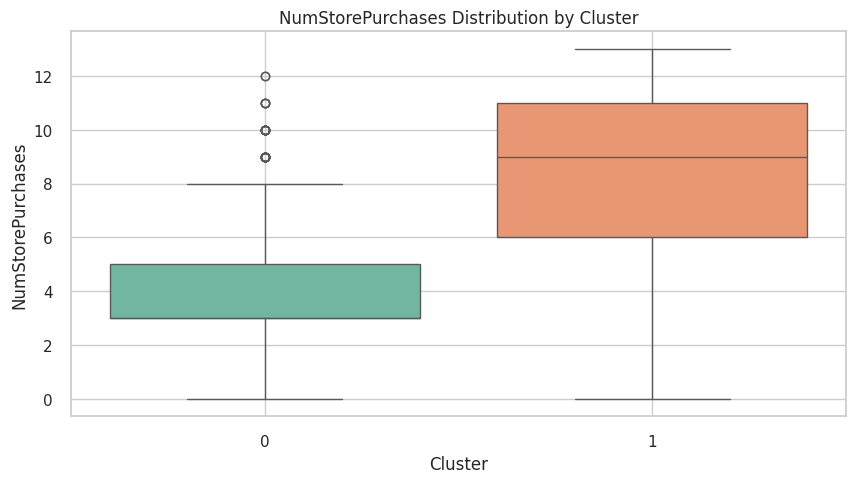

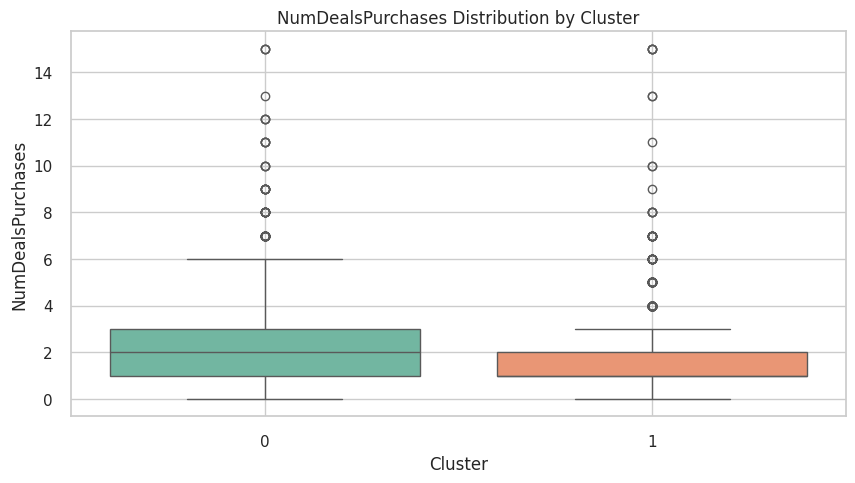

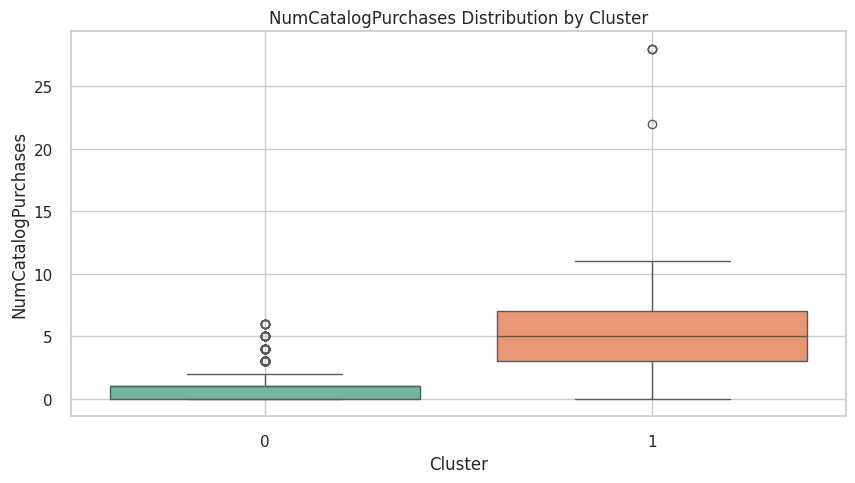

In [ ]:
# Write your code here
import seaborn as sns
import matplotlib.pyplot as plt

# First: Add the cluster labels to the original (non-scaled) data for readability
profile_data = data_encoded.copy()
profile_data['Cluster'] = kmeans_final.labels_

# Optional: Set style
sns.set(style="whitegrid")

# Select key features to profile
features_to_plot = ['Income', 'Tenure', 'Recency',
                    'MntWines', 'MntFruits', 'MntMeatProducts',
                    'MntFishProducts', 'NumWebPurchases', 'Kidhome', 'Teenhome','MntSweetProducts','MntGoldProds','NumStorePurchases','NumDealsPurchases', 'NumCatalogPurchases']

# Create boxplots
for feature in features_to_plot:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='Cluster', y=feature, data=profile_data, palette='Set2')
    plt.title(f'{feature} Distribution by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(feature)
    plt.grid(True)
    plt.show()


##### **Observations:**

Features chosen for profiling:

Income identifies high-spending potential for premium targeting; Tenure shows customer loyalty; Recency shows customers re-engagement.

MntWines/MntFruits/MntMeatProducts/MntFishProduts/MntSweetProducts/MntGoldProds indicates luxary/life-style/dietary interests.

NumWebPurchases/NumStorePurchases/NumDealsPurchases,NumCatalogPurchases reveals purchase activity for store/online marketing focus.

Kidhome/Teenhome provides context on added expenditure.

The box plots visually summarizes the data distribution of chosen features between clusters, showing the median, quartiles, and potential outliers.



#### **Question 11**: Perform cluster profiling on the data using a barplot for the K-Means algorithm. Provide insights and key observations for each cluster based on the visual analysis.

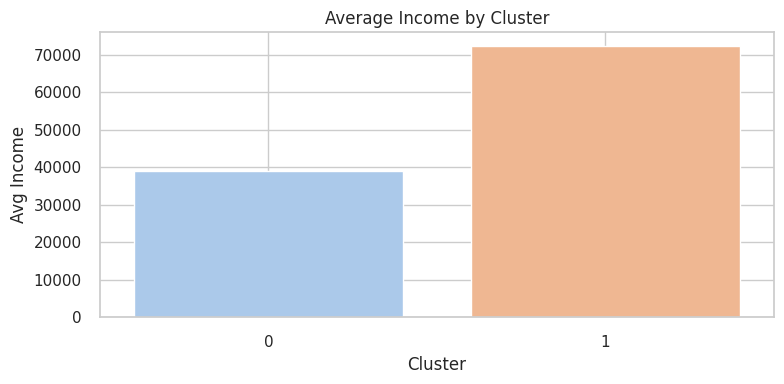

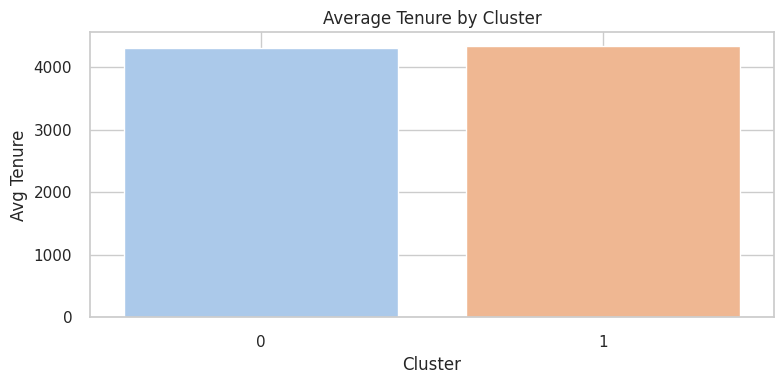

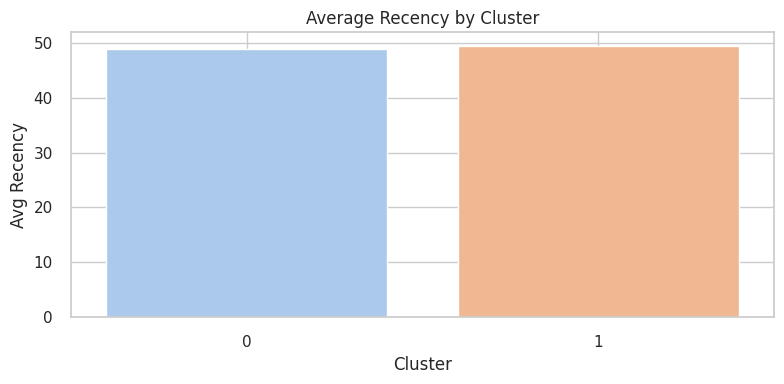

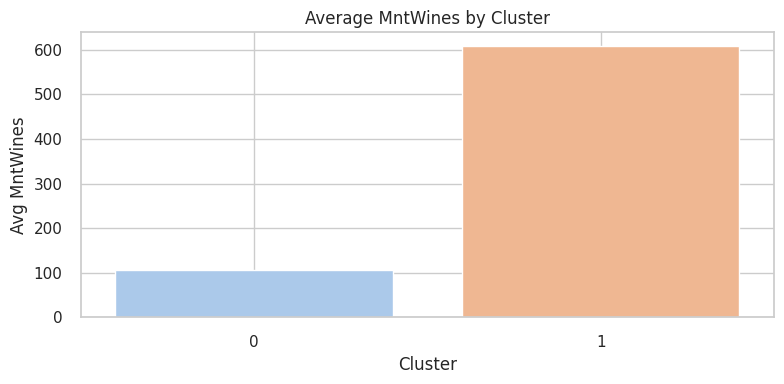

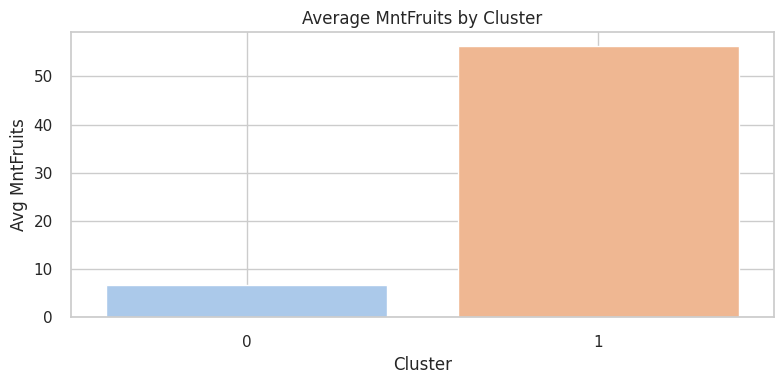

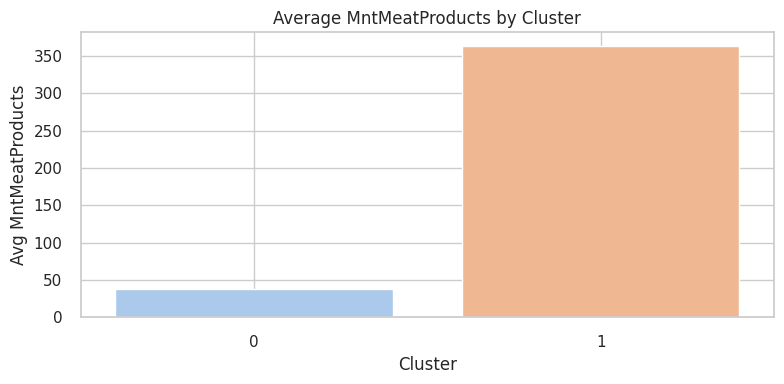

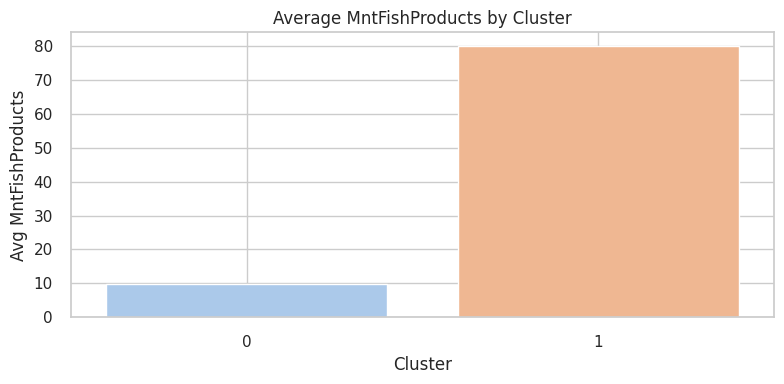

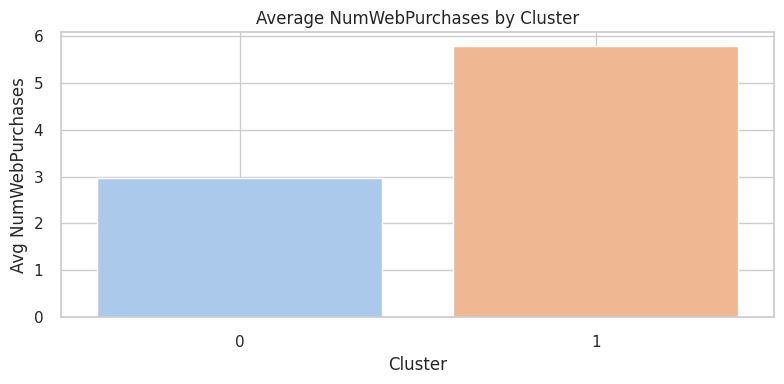

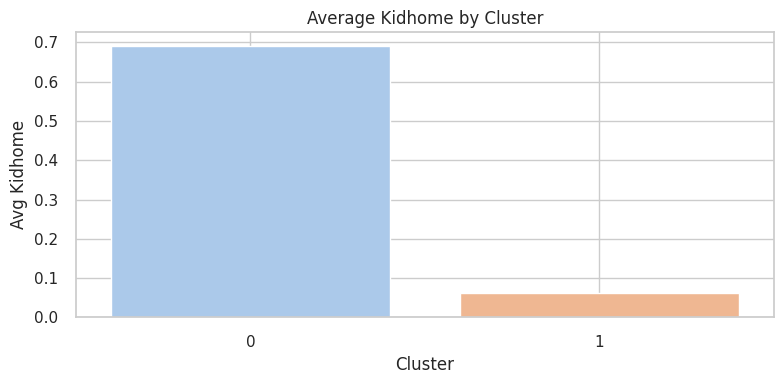

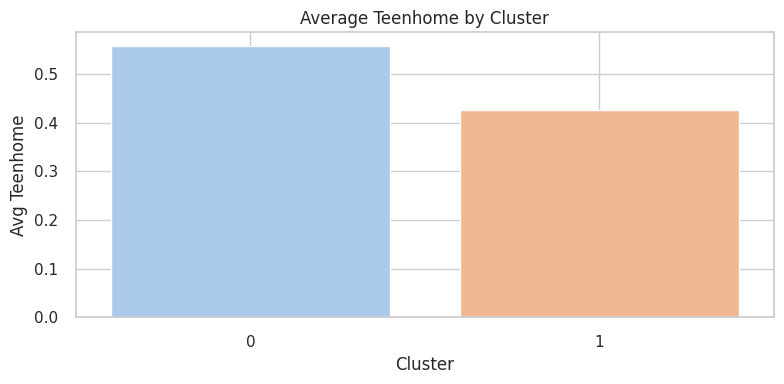

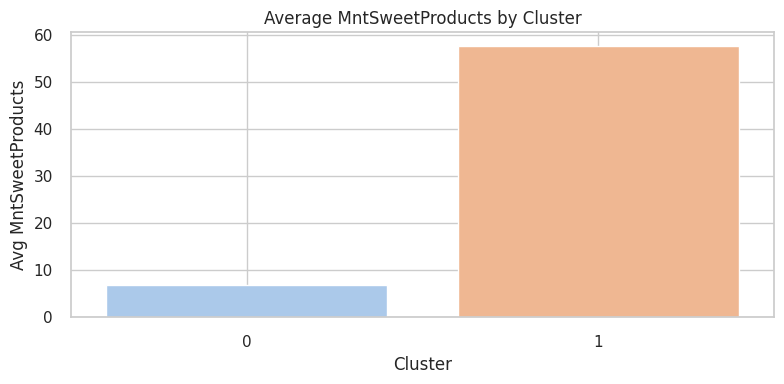

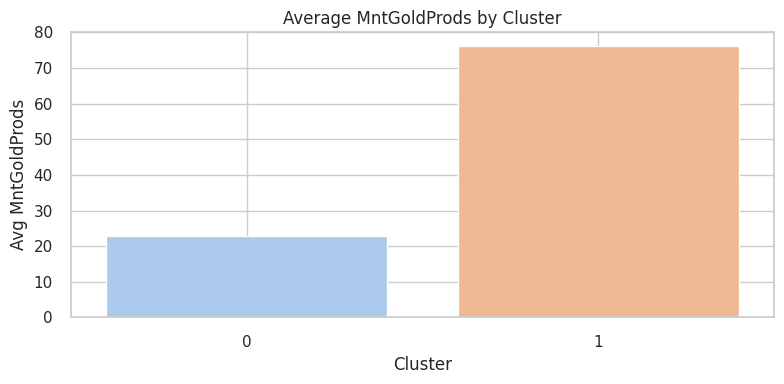

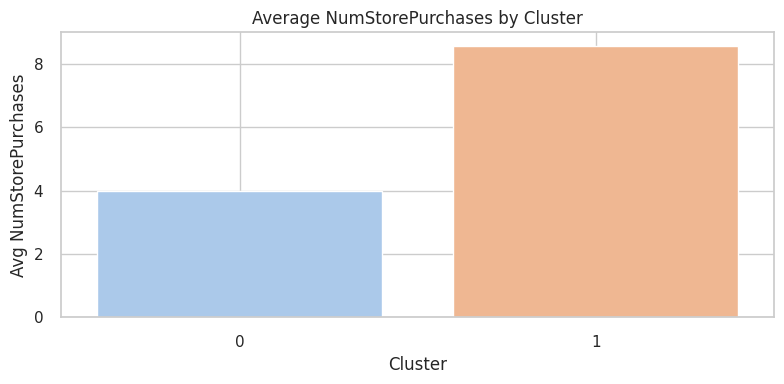

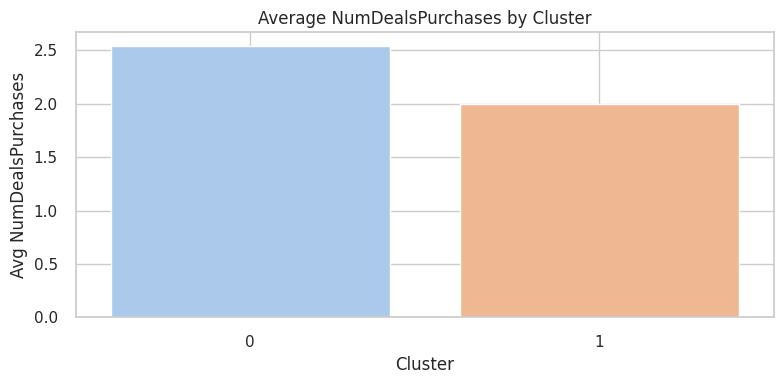

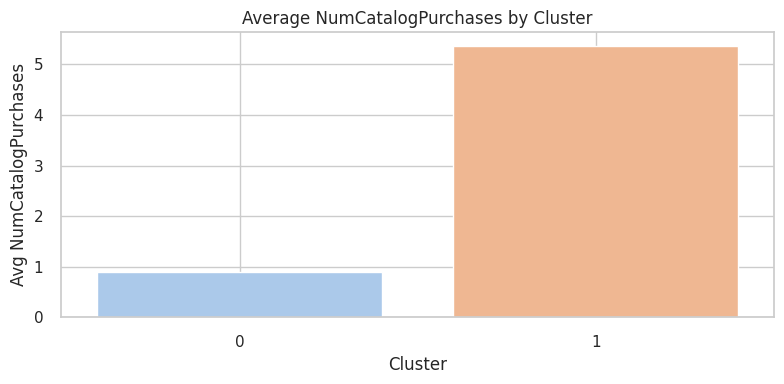

In [ ]:
# Write your code here
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Prepare average values per cluster
cluster_profile = profile_data.groupby('Cluster')[features_to_plot].mean().reset_index()

# 2. Plot each feature across clusters using barplots
sns.set(style="whitegrid")
for feature in features_to_plot:
    plt.figure(figsize=(8, 4))
    sns.barplot(x='Cluster', y=feature, data=cluster_profile, palette='pastel')
    plt.title(f'Average {feature} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(f'Avg {feature}')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

##### **Observations:**
Income: Cluster 1 has significantly higher income than Cluster 0.

Tenure: Both clusters have similar tenure, indicating equal customer longevity.

Recency: Recency is almost identical, meaning both clusters interacted recently.

MntWines/MntFruits/MntMeatProducts/MntFishProduts/MntSweetProducts/MntGoldProds: Cluster 1 spends much more than Cluster 0.


NumWebPurchases/NumStorePurchases/NumCatalogPurchases: Cluster 1 makes more compared to Cluster 0 except for NumDealsPurchases, wherein Cluster 0 makes than Cluster 1.

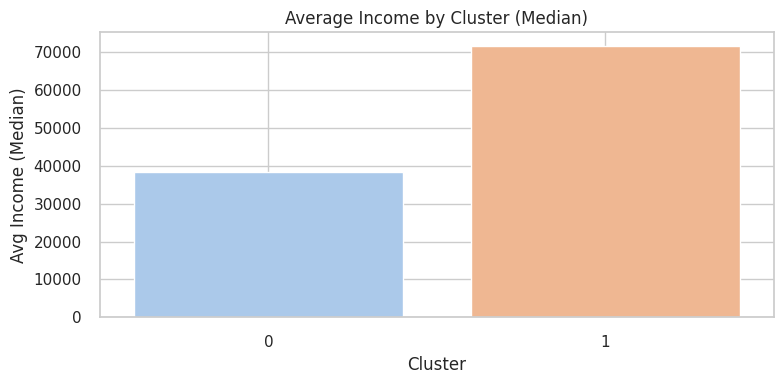

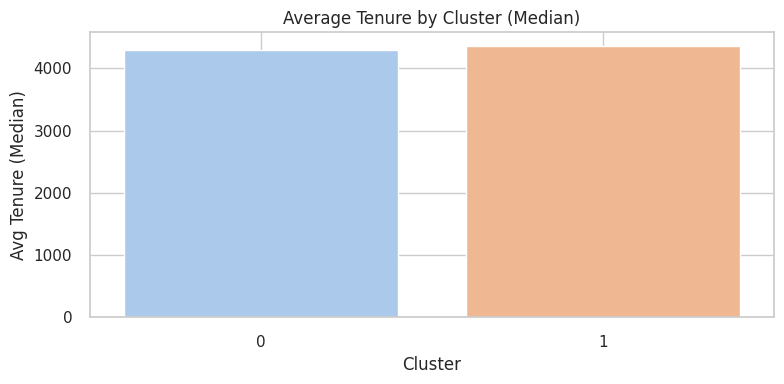

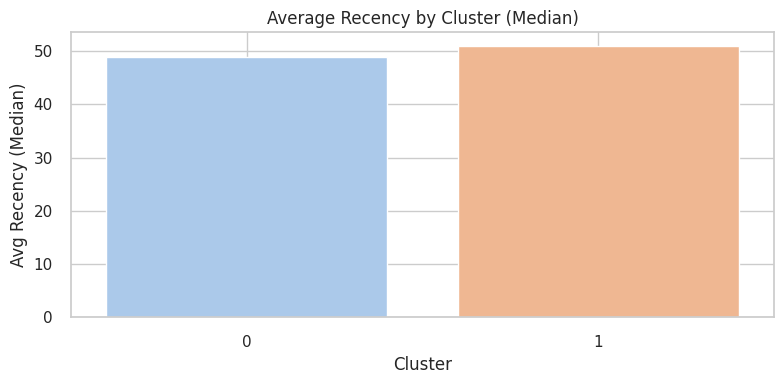

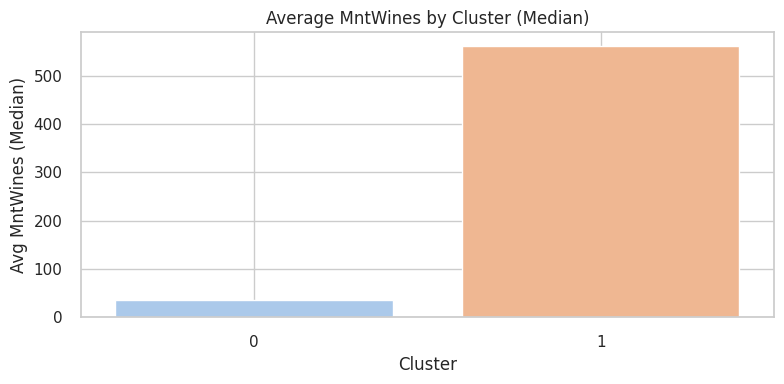

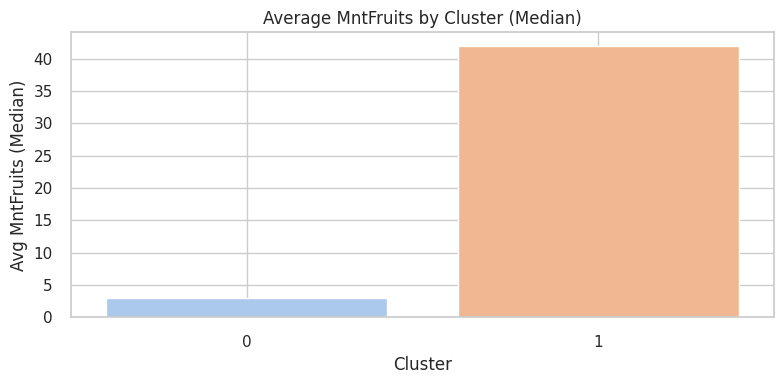

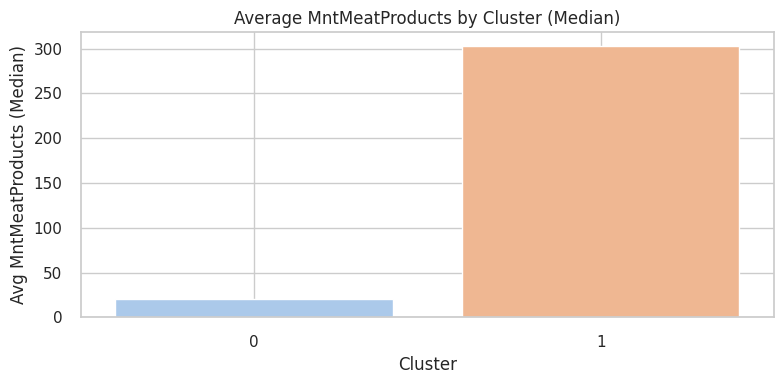

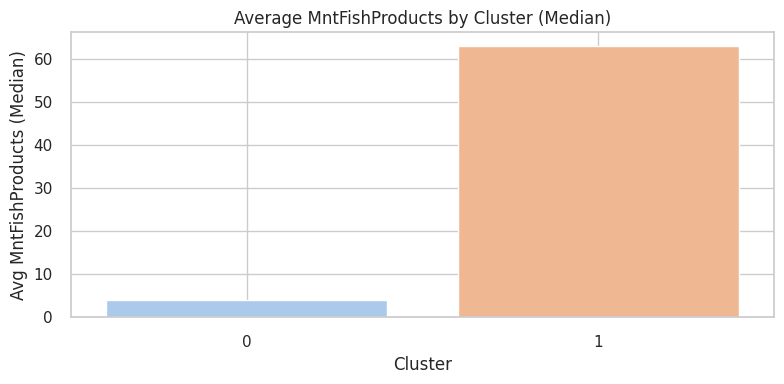

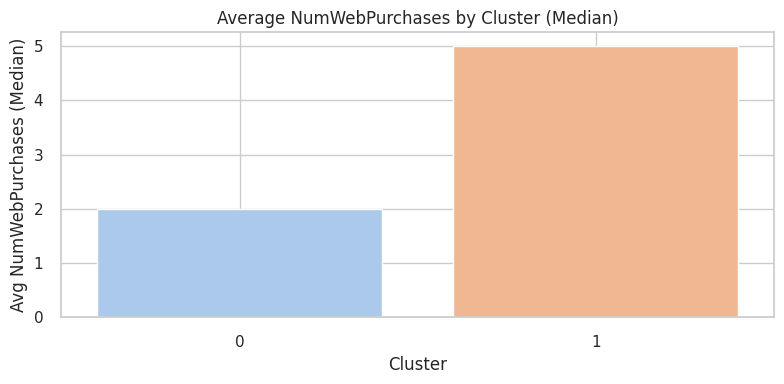

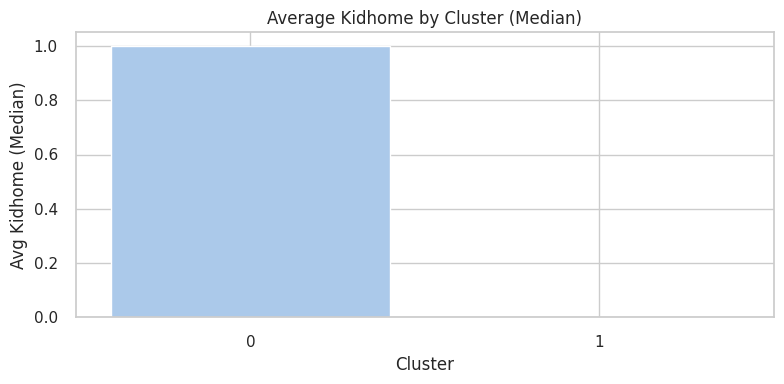

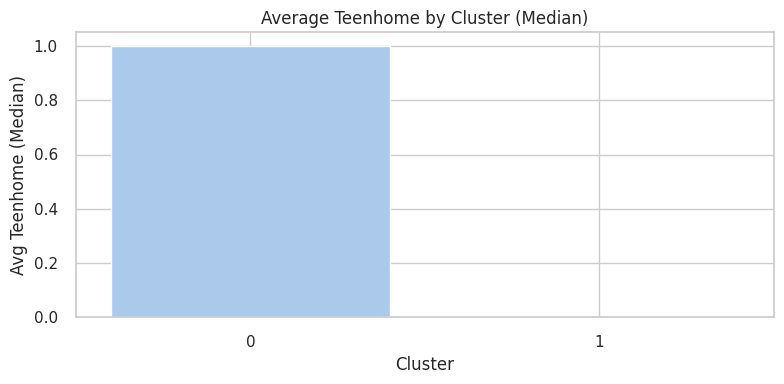

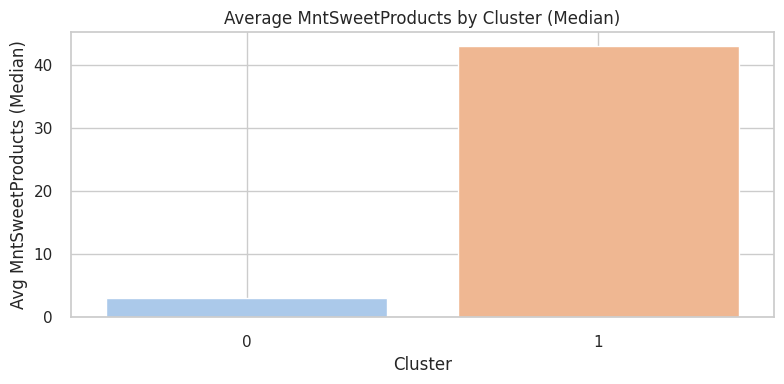

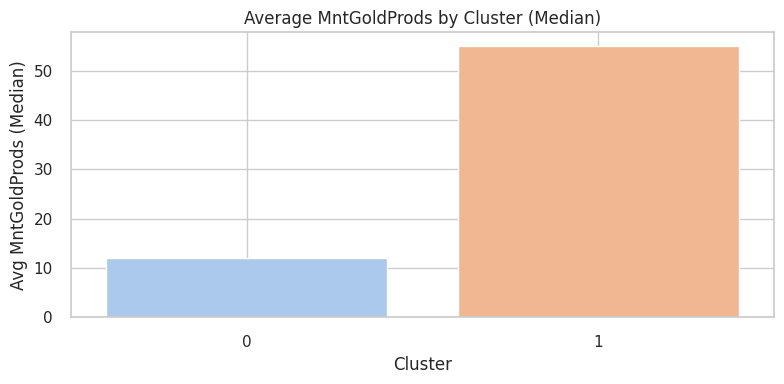

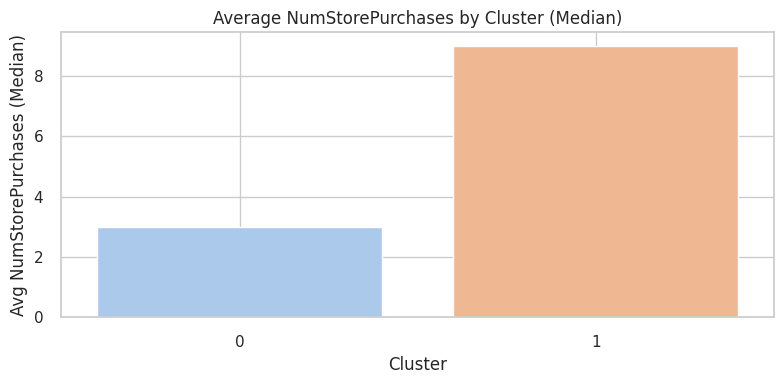

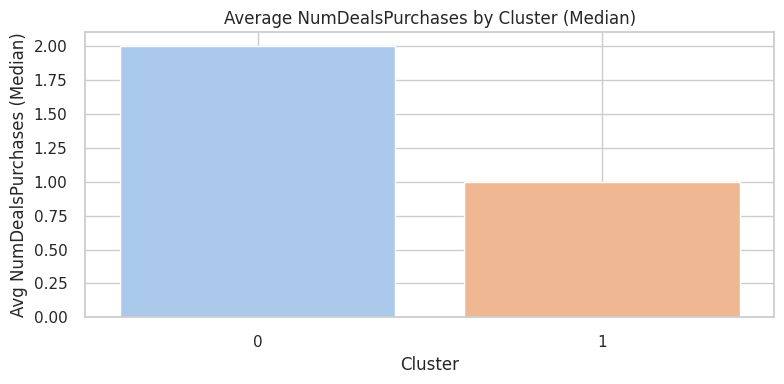

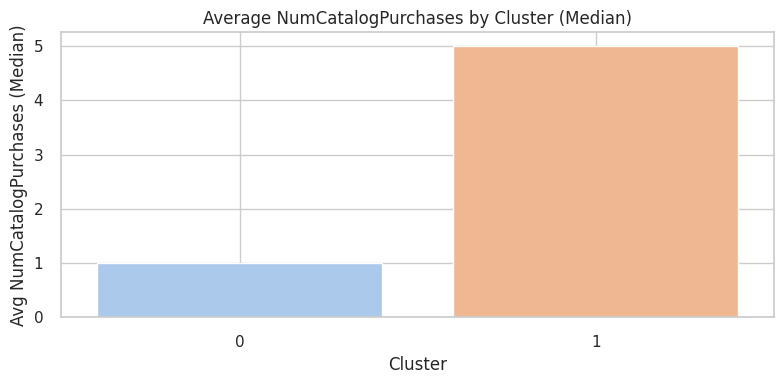

Number of entries per cluster:
   Cluster  Count
0        0   1337
1        1    879


In [ ]:
#Trying with median for profiling
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. Prepare median values per cluster
cluster_profile_median = profile_data.groupby('Cluster')[features_to_plot].median().reset_index()

# 2. Count of entries in each cluster
cluster_counts = profile_data['Cluster'].value_counts().reset_index()
cluster_counts.columns = ['Cluster', 'Count']

# 3. Merging median values with counts
cluster_profile_median = cluster_profile_median.merge(cluster_counts, on='Cluster')

# 4. Plot each feature across clusters using barplots, and display counts
sns.set(style="whitegrid")
for feature in features_to_plot:
    plt.figure(figsize=(8, 4))
    sns.barplot(x='Cluster', y=feature, data=cluster_profile_median, palette='pastel')
    plt.title(f'Average {feature} by Cluster (Median)')
    plt.xlabel('Cluster')
    plt.ylabel(f'Avg {feature} (Median)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# 5. Print the number of entries per cluster
print("Number of entries per cluster:")
print(cluster_counts)


## **Business Recommedations**

#### **Question 12**: Based on the cluster insights, what business

recommendations can be provided?

**Cluster 0:** Low-Income, Low-Spend, Less Digital
* Offer personalized discounts and value bundles to encourage purchases.

* Launch reactivation campaigns to boost engagement.

* Highlight affordable product ranges in marketing.

* Use offline channels (e.g., flyers, coupons) since digital engagement is lower.

* Consider cross-selling entry-level products in high-penetration categories.

**Cluster 1:** High-Income, High-Spend, Highly Digital
* Roll out premium product bundles and exclusive member offers.

* Invest in personalized online campaigns — use app notifications, emails, or targeted ads.

* Promote gourmet, niche, and seasonal product launches.

* Introduce or enhance loyalty and rewards programs to retain this valuable group.

* Encourage referrals with VIP perks or early access deals.